# Let's read in our manually tracked Exp005 FRAP data and generate some plots

These files contain the data for foci and the surrounding cytoplasmic spot

## TODO

- More consistent naming of measurements
- Better ROIs


In [1]:
from os import listdir

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize

In [2]:
#Define the folder containing your file of interest,
#Currently this is './' the current folder
tracking_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp005_Improved_FocusTracking/"

In [3]:
tracking_files = listdir(tracking_folder)
tracking_files

['EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_05_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_07_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_08_Tracking_Results.csv',
 'EML4-ALKv1_Box_FRAP_09_Tracking_Results.csv',
 'EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv',
 'EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv',
 'EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv',
 'EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv']

## Read in the data

There are no symbols in the header so reading in the data here is simple

In [4]:
df_list = list()

for n, file in enumerate(tracking_files):
    
    path = tracking_folder+file

    df = pd.read_csv(tracking_folder+file)
    
    # Let's clean up the header
    df.rename(columns={"tracks": "Track", "slices": "Frame"}, inplace=True) #Frame is a better name for timepoints
    
    # We can add the file name and a numeric index at this early stage.
    df.insert(0, 'File', n)
    df['Filename'] = file
    
    df_list.append(df)

In [5]:
df_list[1]

File  Track  Frame    X    Y  focus_intensities  spot_intensities  \
0       1      1      1  241  236            383.959           207.469   
1       1      1      2  242  234            141.835           133.490   
2       1      1      3  241  234            150.412           136.337   
3       1      1      4  242  234            154.711           145.597   
4       1      1      5  243  234            171.320           157.362   
..    ...    ...    ...  ...  ...                ...               ...   
398     1      3    117  216  264            231.196           202.755   
399     1      3    118  214  261            230.216           209.128   
400     1      3    119  213  257            222.546           212.663   
401     1      3    120  213  257            218.557           207.944   
402     1      3    121  215  258            223.155           213.791   

                                        Filename  
0    EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
1    EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
2    EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
3    EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
4    EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
..                                           ...  
398  EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
399  EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
400  EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
401  EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  
402  EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv  

[403 rows x 8 columns]

## Pull out Individual Traces

In [6]:
# Concatenate dataframes from different files, and group by File and Track for plotting
combined_tracking_df = pd.concat(df_list, axis=0)
combined_tracking_df

File  Track  Frame    X    Y  focus_intensities  spot_intensities  \
0       0      1      1  229  268            195.701           125.750   
1       0      1      2  229  268            122.021           119.526   
2       0      1      3  229  268            120.093           116.668   
3       0      1      4  229  268            119.732           117.791   
4       0      1      5  229  269            122.577           118.964   
..    ...    ...    ...  ...  ...                ...               ...   
355    10      3    116  272  240            807.309           488.020   
356    10      3    117  272  240            832.454           487.301   
357    10      3    118  272  240            825.062           472.980   
358    10      3    119  272  240            808.433           478.816   
359    10      3    120  272  239            761.845           482.327   

                                        Filename  
0    EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  
1    EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  
2    EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  
3    EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  
4    EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  
..                                           ...  
355  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  
356  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  
357  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  
358  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  
359  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  

[5580 rows x 8 columns]

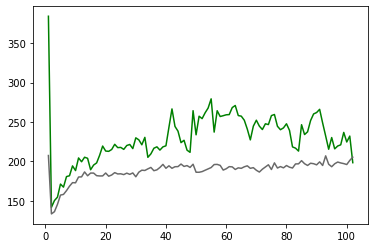

In [8]:
# Plot individual trace
file_number = 1
track_number = 1

data = combined_tracking_df[combined_tracking_df.File.eq(file_number) & combined_tracking_df.Track.eq(track_number)]
plt.plot(data.Frame, data.focus_intensities, c='g');
plt.plot(data.Frame, data.spot_intensities, c='dimgrey');

In [9]:
# How many traces do we have total?
summary_df = combined_tracking_df.groupby(by=["File", "Track"]).max().reset_index()

# Annotate files with relevant protein
summary_df["ALKv1"] = summary_df['Filename'].str.contains("ALKv1")
summary_df["ALKv3"] = summary_df['Filename'].str.contains("ALKv3")
summary_df

File  Track  Frame    X    Y  focus_intensities  spot_intensities  \
0      0      1    120  231  269            195.701           125.750   
1      0      2    120  274  262            160.918           134.974   
2      0      3    120  279  250            171.711           132.036   
3      0      4    120  250  239            149.021           129.403   
4      0      5    120  230  294            140.887           127.097   
5      1      1    102  249  237            383.959           207.469   
6      1      2    180  292  244            437.773           218.765   
7      1      3    121  245  275            367.186           252.357   
8      2      1     43  262  248            636.443           306.704   
9      3      1    120  229  236           1575.113           916.883   
10     3      2    120  257  279            731.258           420.556   
11     3      3    120  274  276            659.196           448.643   
12     3      4    120  280  258            842.928           683.689   
13     3      5    120  235  284            521.887           380.561   
14     3      6     32  298  257           3372.134          1587.776   
15     3      7    120  238  254           1054.701           761.908   
16     4      1    120  239  224            191.464           121.607   
17     4      2     83  302  248            329.041           159.724   
18     4      3    120  262  291            568.216           123.689   
19     4      4    120  220  280            129.423           118.929   
20     5      1     90  238  293            422.485           219.342   
21     5      2     80  283  291            475.546           229.923   
22     5      3    120  239  240           1131.979           262.051   
23     5      4    120  267  251            300.969           305.526   
24     5      5    120  255  254           1435.392           272.903   
25     6      1     92  231  257            236.907           148.668   
26     6      2    120  244  276            597.825           147.306   
27     6      3    120  260  244            184.113           135.439   
28     6      4    120  285  271            280.814           136.944   
29     6      5    120  290  240            290.866           156.020   
30     7      1    120  236  244            614.093           261.781   
31     7      2    120  262  249            405.258           205.066   
32     7      3    120  274  237            250.278           196.082   
33     7      4    105  251  282            316.804           217.082   
34     7      5    120  275  269            291.990           214.276   
35     8      1    120  256  270            825.557           198.587   
36     8      2    120  281  253            566.557           208.668   
37     8      3    120  288  286            245.680           167.240   
38     8      4    120  240  238            469.670           249.367   
39     8      5    120  278  228            620.072           215.806   
40     9      1    120  243  263           1360.598           494.949   
41     9      2    120  255  260           1106.742           480.556   
42     9      3    102  273  251            810.381           591.638   
43     9      4    120  290  261            834.299           482.102   
44     9      5      1  241  243            775.577           397.372   
45     9      6    120  255  245            654.010           674.867   
46     9      7      2  304  238            841.918           388.944   
47     9      8    120  257  246            625.247           674.867   
48    10      1    120  233  287            359.567           247.505   
49    10      2    120  260  261            598.804           252.286   
50    10      3    120  279  240           1145.856           565.520   

                                       Filename  ALKv1  ALKv3  
0   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
1   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
2   EML4-ALKv1_

In [10]:
#We have 50 tracks.
#30 for EML4-ALKv1
#21 for EML4-ALKv3
summary_df["ALKv3"].value_counts()

False    30
True     21
Name: ALKv3, dtype: int64

In [11]:
#40 tracks are full length
(summary_df["Frame"]>=120).value_counts()

True     40
False    11
Name: Frame, dtype: int64

In [12]:
idx = np.where((summary_df["Frame"]>=120) & (summary_df["ALKv1"]==True))

## 23 full ALKv1 tracks
summary_df.loc[idx].reset_index()

index  File  Track  Frame    X    Y  focus_intensities  spot_intensities  \
0       0     0      1    120  231  269            195.701           125.750   
1       1     0      2    120  274  262            160.918           134.974   
2       2     0      3    120  279  250            171.711           132.036   
3       3     0      4    120  250  239            149.021           129.403   
4       4     0      5    120  230  294            140.887           127.097   
5       6     1      2    180  292  244            437.773           218.765   
6       7     1      3    121  245  275            367.186           252.357   
7       9     3      1    120  229  236           1575.113           916.883   
8      10     3      2    120  257  279            731.258           420.556   
9      11     3      3    120  274  276            659.196           448.643   
10     12     3      4    120  280  258            842.928           683.689   
11     13     3      5    120  235  284            521.887           380.561   
12     15     3      7    120  238  254           1054.701           761.908   
13     16     4      1    120  239  224            191.464           121.607   
14     18     4      3    120  262  291            568.216           123.689   
15     19     4      4    120  220  280            129.423           118.929   
16     22     5      3    120  239  240           1131.979           262.051   
17     23     5      4    120  267  251            300.969           305.526   
18     24     5      5    120  255  254           1435.392           272.903   
19     26     6      2    120  244  276            597.825           147.306   
20     27     6      3    120  260  244            184.113           135.439   
21     28     6      4    120  285  271            280.814           136.944   
22     29     6      5    120  290  240            290.866           156.020   

                                       Filename  ALKv1  ALKv3  
0   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
1   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
2   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
3   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
4   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
5   EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv   True  False  
6   EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv   True  False  
7   EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
8   EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
9   EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
10  EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
11  EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
12  EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
13  EML4-ALKv1_Box_FRAP_07_Tracking_Results.csv   True  False  
14  EML4-ALKv1_Box_FRAP_07_Tracking_Results.csv   True  False  
15  EML4-ALKv1_Box_FRAP_07_Tracking_Results.csv   True  False  
16  EML4-ALKv1_Box_FRAP_08_Tracking_Results.csv   True  False  
17  EML4-ALKv1_Box_FRAP_08_Tracking_Results.csv   True  False  
18  EML4-ALKv1_Box_FRAP_08_Tracking_Results.csv   True  False  
19  EML4-ALKv1_Box_FRAP_09_Tracking_Results.csv   True  False  
20  EML4-ALKv1_Box_FRAP_09_Tracking_Results.csv   True  False  
21  EML4-ALKv1_Box_FRAP_09_Tracking_Results.csv   True  False  
22  EML4-ALKv1_Box_FRAP_09_Tracking_Results.csv   True  False

In [13]:
idx = np.where((summary_df["Frame"]>=120) & (summary_df["ALKv3"]==True))

## 17 full ALKv3 tracks
summary_df.loc[idx].reset_index()

index  File  Track  Frame    X    Y  focus_intensities  spot_intensities  \
0      30     7      1    120  236  244            614.093           261.781   
1      31     7      2    120  262  249            405.258           205.066   
2      32     7      3    120  274  237            250.278           196.082   
3      34     7      5    120  275  269            291.990           214.276   
4      35     8      1    120  256  270            825.557           198.587   
5      36     8      2    120  281  253            566.557           208.668   
6      37     8      3    120  288  286            245.680           167.240   
7      38     8      4    120  240  238            469.670           249.367   
8      39     8      5    120  278  228            620.072           215.806   
9      40     9      1    120  243  263           1360.598           494.949   
10     41     9      2    120  255  260           1106.742           480.556   
11     43     9      4    120  290  261            834.299           482.102   
12     45     9      6    120  255  245            654.010           674.867   
13     47     9      8    120  257  246            625.247           674.867   
14     48    10      1    120  233  287            359.567           247.505   
15     49    10      2    120  260  261            598.804           252.286   
16     50    10      3    120  279  240           1145.856           565.520   

                                       Filename  ALKv1  ALKv3  
0   EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv  False   True  
1   EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv  False   True  
2   EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv  False   True  
3   EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv  False   True  
4   EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
5   EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
6   EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
7   EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
8   EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
9   EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv  False   True  
10  EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv  False   True  
11  EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv  False   True  
12  EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv  False   True  
13  EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv  False   True  
14  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  False   True  
15  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  False   True  
16  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  False   True

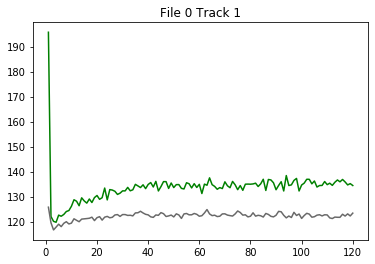

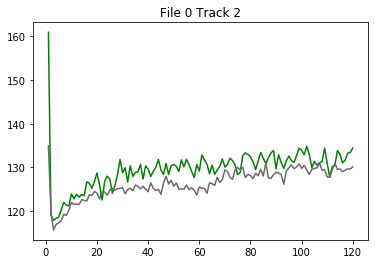

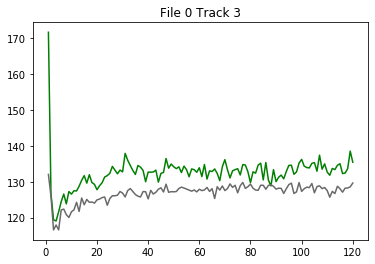

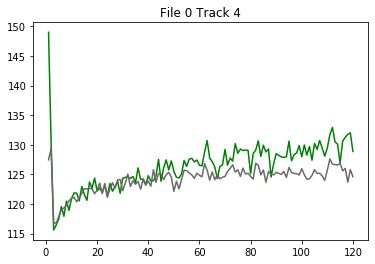

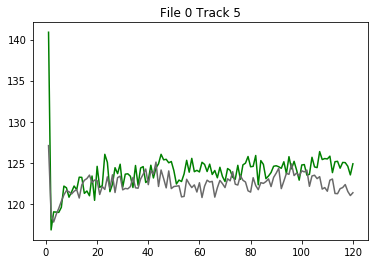

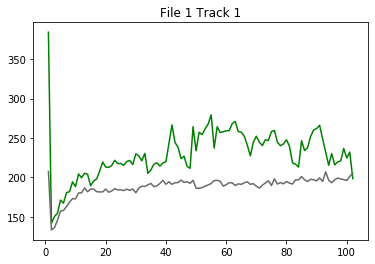

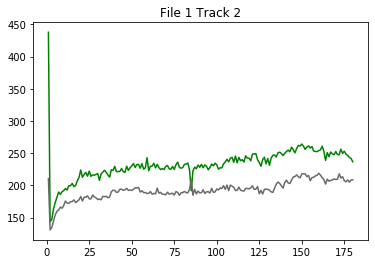

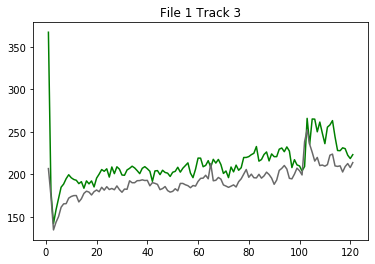

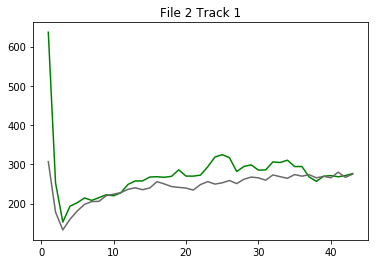

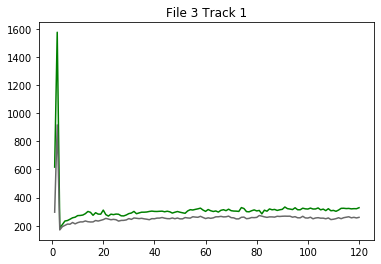

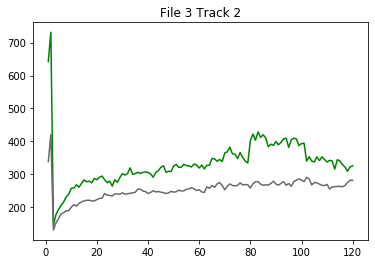

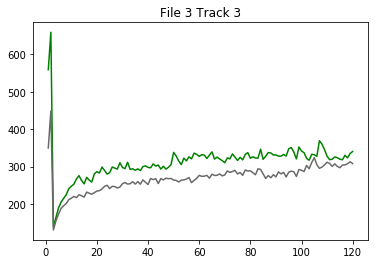

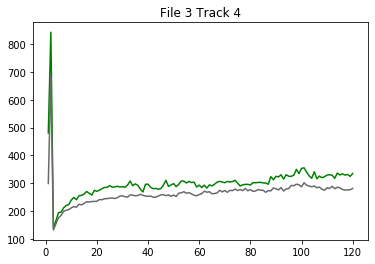

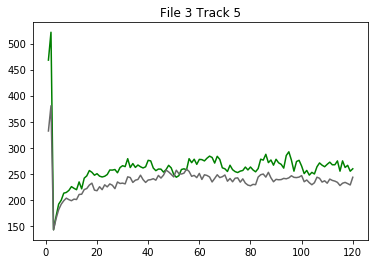

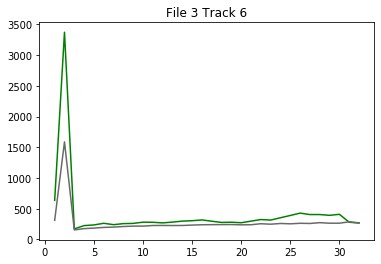

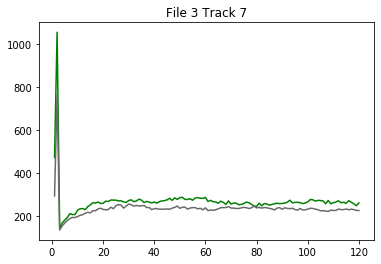

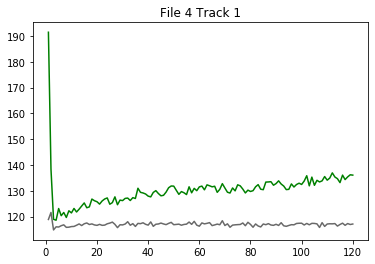

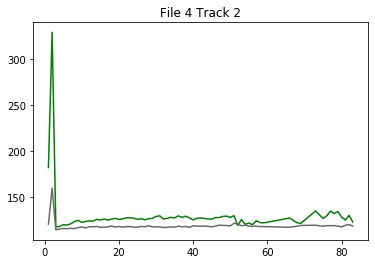

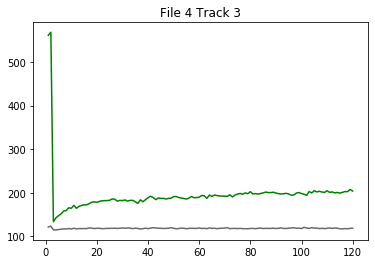

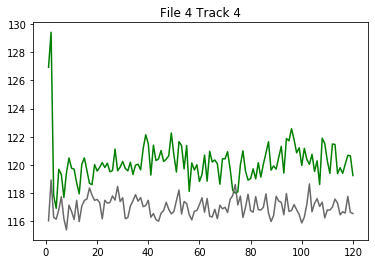

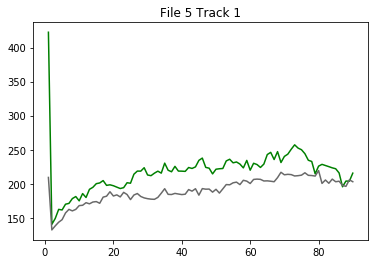

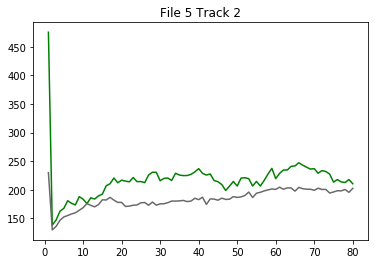

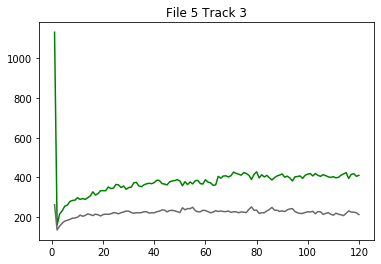

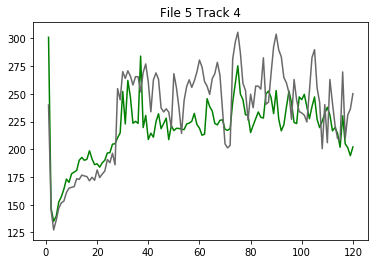

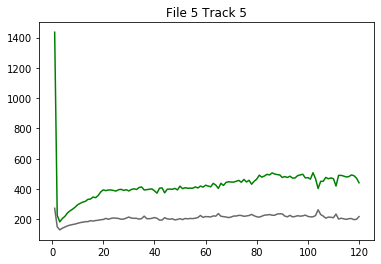

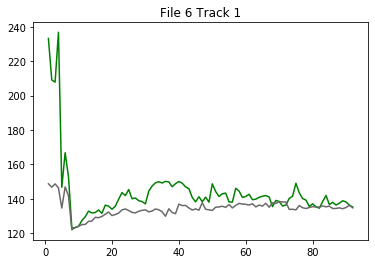

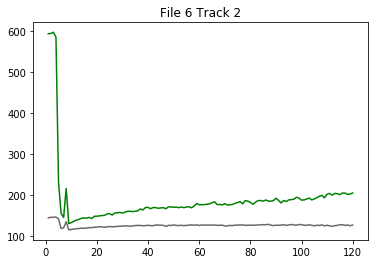

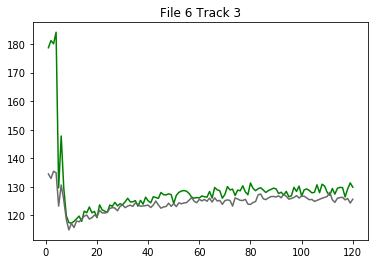

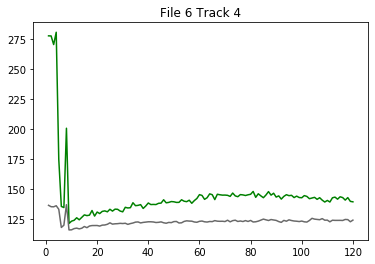

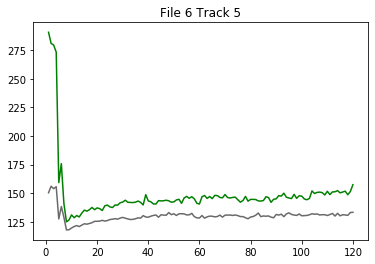

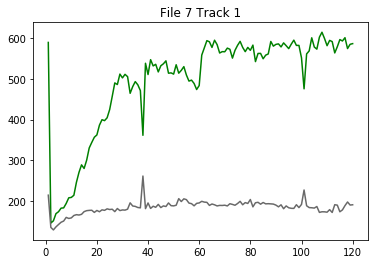

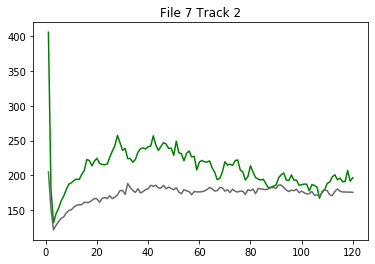

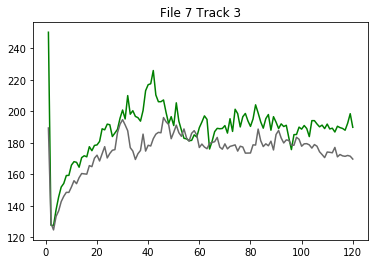

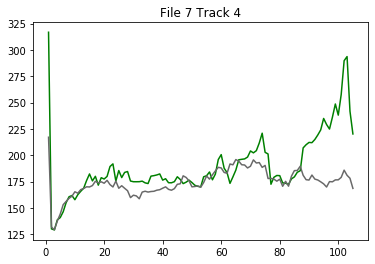

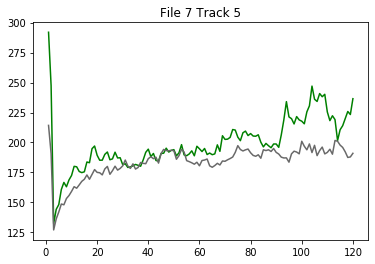

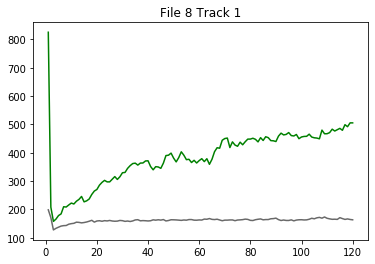

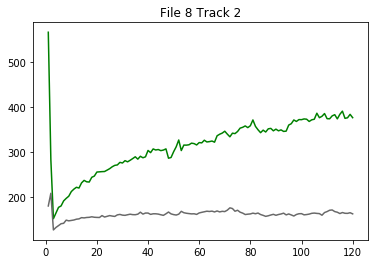

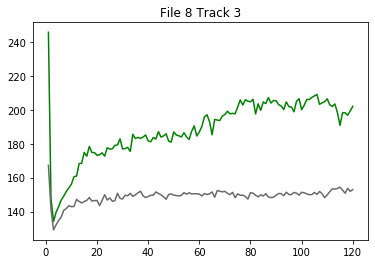

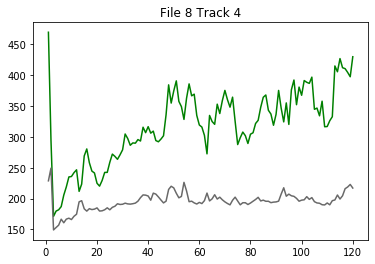

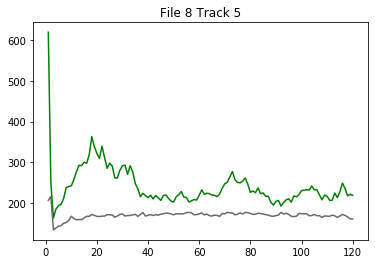

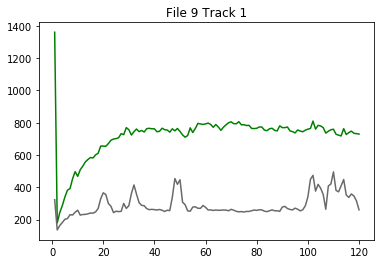

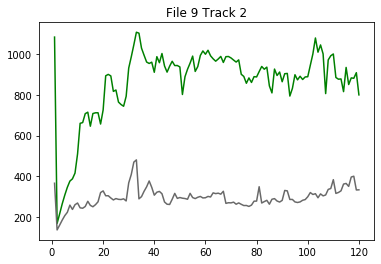

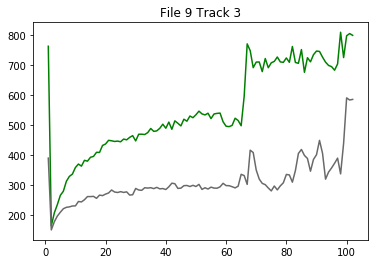

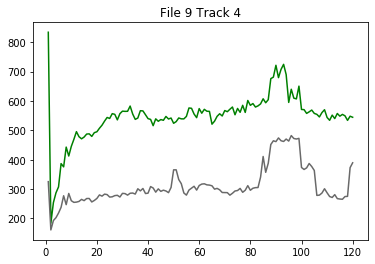

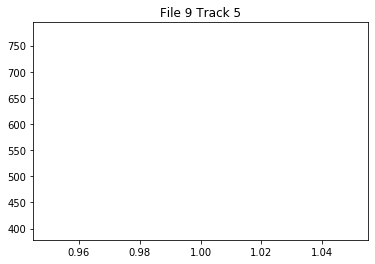

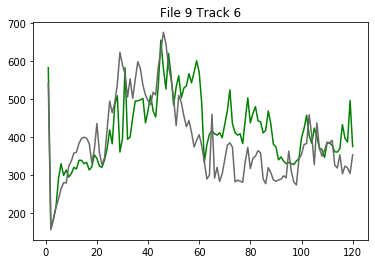

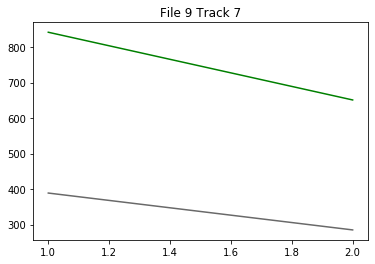

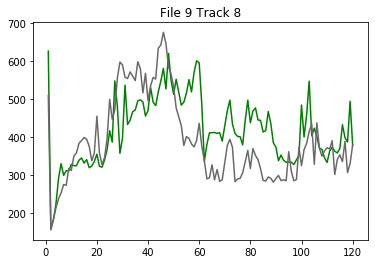

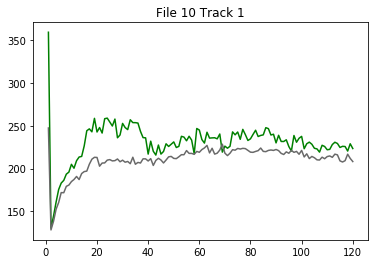

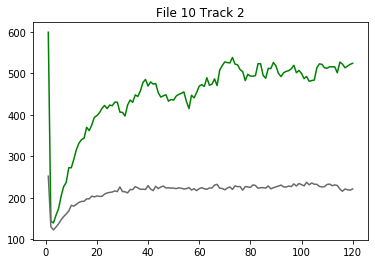

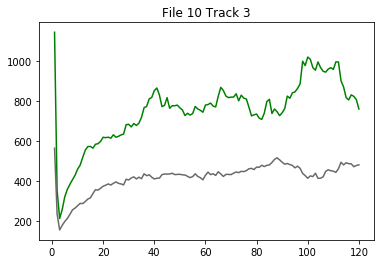

In [14]:
for file_number in combined_tracking_df.File.unique():
    file_data = combined_tracking_df[combined_tracking_df.File.eq(file_number)]
    
    for track_number in file_data.Track.unique():
        track_data = file_data[file_data.Track.eq(track_number)]

        plt.plot(track_data.Frame, track_data.focus_intensities, c='g');
        plt.plot(track_data.Frame, track_data.spot_intensities, c='dimgrey');
        plt.title("File "+ str(file_number) + " Track "+ str(track_number))
        plt.show()

## We need the Bleach Frame 't0' and the Frame Rate 'fps'

In [15]:
## Each file needs a "BGD" control for normalization.
background_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp005_Results/"
background_files = listdir(background_folder)

background_df_list = list()

for n, file in enumerate(background_files):
    
    path = background_folder+file

    # We have to use the open function because the ImageJ manual tracker plugin gave headers with a degree symbol.
    df = pd.read_csv(path)
    
    # Append file name
    df['Filename'] = file
    
    # Rename 1st column as Frames
    df.rename(columns={' ': 'Frame'}, inplace=True)
    
    # Drop unnecessary columns
    df = df.loc[:,['Frame', 'Mean(Bgd)', 'Filename']]
    
    background_df_list.append(df)

In [16]:
# Let's generate a list of t0 frames for these files.
# We can edit the files with distinct t0 frames.
t0_list=[2]*len(background_files)

#EML4-ALKv1_Box_FRAP_09 t0 is 8, not 2 like everything else
t0_list[5] = 8

In [17]:
# Let's generate a list of fps values for these files.
fps_list=[1/5]*len(background_files)

#EML4-ALKv1_Box_FRAP_09 fps is 1, not 0.2 like everything else
fps_list[5] = 1

In [18]:
# Quick check
background_df_list[3]

Frame  Mean(Bgd)                            Filename
0        1    114.775  EML4-ALKv1_Box_FRAP_07_Results.csv
1        2    114.631  EML4-ALKv1_Box_FRAP_07_Results.csv
2        3    114.532  EML4-ALKv1_Box_FRAP_07_Results.csv
3        4    115.102  EML4-ALKv1_Box_FRAP_07_Results.csv
4        5    114.157  EML4-ALKv1_Box_FRAP_07_Results.csv
..     ...        ...                                 ...
115    116    114.270  EML4-ALKv1_Box_FRAP_07_Results.csv
116    117    114.396  EML4-ALKv1_Box_FRAP_07_Results.csv
117    118    114.952  EML4-ALKv1_Box_FRAP_07_Results.csv
118    119    114.898  EML4-ALKv1_Box_FRAP_07_Results.csv
119    120    113.986  EML4-ALKv1_Box_FRAP_07_Results.csv

[120 rows x 3 columns]

In [19]:
## Clean up filenames and merge data frames on Filename and Frame?
background_df_list[3].Filename.str.replace("_Results.csv", "")

0      EML4-ALKv1_Box_FRAP_07
1      EML4-ALKv1_Box_FRAP_07
2      EML4-ALKv1_Box_FRAP_07
3      EML4-ALKv1_Box_FRAP_07
4      EML4-ALKv1_Box_FRAP_07
                ...          
115    EML4-ALKv1_Box_FRAP_07
116    EML4-ALKv1_Box_FRAP_07
117    EML4-ALKv1_Box_FRAP_07
118    EML4-ALKv1_Box_FRAP_07
119    EML4-ALKv1_Box_FRAP_07
Name: Filename, Length: 120, dtype: object

In [20]:
background_combined_df = pd.concat(background_df_list, axis=0)

In [21]:
#Clean up Tracking Results File Names
combined_tracking_df.Filename.str.replace("_Tracking_Results.csv", "")

0      EML4-ALKv1_Box_FRAP_03
1      EML4-ALKv1_Box_FRAP_03
2      EML4-ALKv1_Box_FRAP_03
3      EML4-ALKv1_Box_FRAP_03
4      EML4-ALKv1_Box_FRAP_03
                ...          
355    EML4-ALKv3_Box_FRAP_07
356    EML4-ALKv3_Box_FRAP_07
357    EML4-ALKv3_Box_FRAP_07
358    EML4-ALKv3_Box_FRAP_07
359    EML4-ALKv3_Box_FRAP_07
Name: Filename, Length: 5580, dtype: object

In [22]:
def merge_BGD(tracking_result_df, bgd_results_df):
    
    tracking_result_df["Experiment"] = tracking_result_df.Filename.str.replace("_Tracking_Results.csv", "")
    bgd_results_df["Experiment"]     = bgd_results_df.Filename.str.replace("_Results.csv", "")
    

    return pd.merge(tracking_result_df, bgd_results_df, on=["Experiment", "Frame"])

In [23]:
main_df = merge_BGD(combined_tracking_df, background_combined_df)
main_df = main_df.sort_values(by=['File', 'Track', 'Frame']).reset_index(drop=True)
main_df

File  Track  Frame    X    Y  focus_intensities  spot_intensities  \
0        0      1      1  229  268            195.701           125.750   
1        0      1      2  229  268            122.021           119.526   
2        0      1      3  229  268            120.093           116.668   
3        0      1      4  229  268            119.732           117.791   
4        0      1      5  229  269            122.577           118.964   
...    ...    ...    ...  ...  ...                ...               ...   
5532    10      3    116  272  240            807.309           488.020   
5533    10      3    117  272  240            832.454           487.301   
5534    10      3    118  272  240            825.062           472.980   
5535    10      3    119  272  240            808.433           478.816   
5536    10      3    120  272  239            761.845           482.327   

                                       Filename_x              Experiment  \
0     EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  EML4-ALKv1_Box_FRAP_03   
1     EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  EML4-ALKv1_Box_FRAP_03   
2     EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  EML4-ALKv1_Box_FRAP_03   
3     EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  EML4-ALKv1_Box_FRAP_03   
4     EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv  EML4-ALKv1_Box_FRAP_03   
...                                           ...                     ...   
5532  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  EML4-ALKv3_Box_FRAP_07   
5533  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  EML4-ALKv3_Box_FRAP_07   
5534  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  EML4-ALKv3_Box_FRAP_07   
5535  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  EML4-ALKv3_Box_FRAP_07   
5536  EML4-ALKv3_Box_FRAP_07_Tracking_Results.csv  EML4-ALKv3_Box_FRAP_07   

      Mean(Bgd)                          Filename_y  
0       113.280  EML4-ALKv1_Box_FRAP_03_Results.csv  
1       114.126  EML4-ALKv1_Box_FRAP_03_Results.csv  
2       113.918  EML4-ALKv1_Box_FRAP_03_Results.csv  
3       113.604  EML4-ALKv1_Box_FRAP_03_Results.csv  
4       113.601  EML4-ALKv1_Box_FRAP_03_Results.csv  
...         ...                                 ...  
5532    114.778  EML4-ALKv3_Box_FRAP_07_Results.csv  
5533    114.034  EML4-ALKv3_Box_FRAP_07_Results.csv  
5534    114.406  EML4-ALKv3_Box_FRAP_07_Results.csv  
5535    113.454  EML4-ALKv3_Box_FRAP_07_Results.csv  
5536    114.031  EML4-ALKv3_Box_FRAP_07_Results.csv  

[5537 rows x 11 columns]

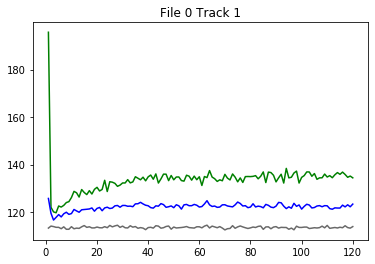

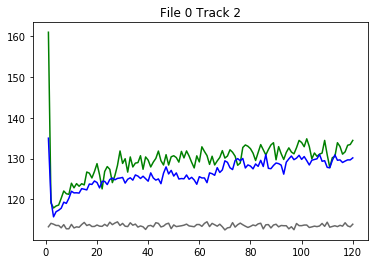

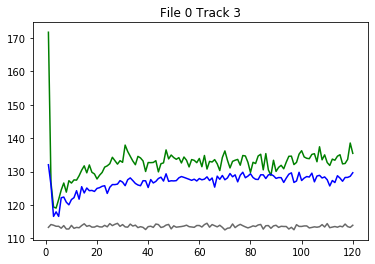

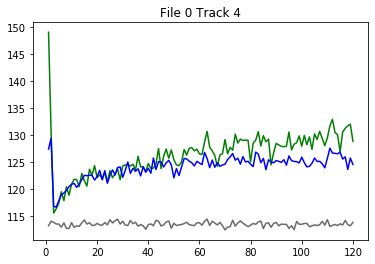

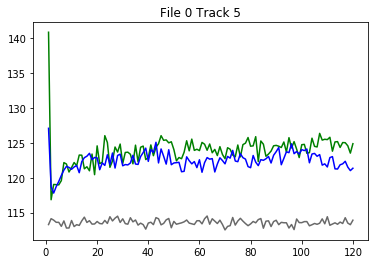

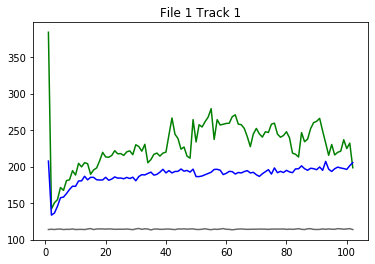

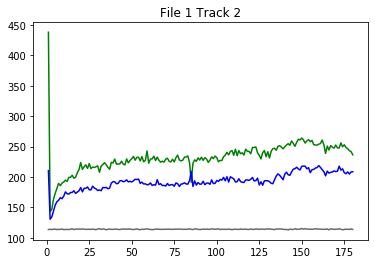

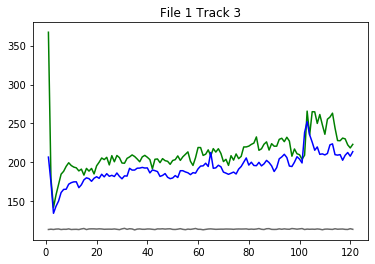

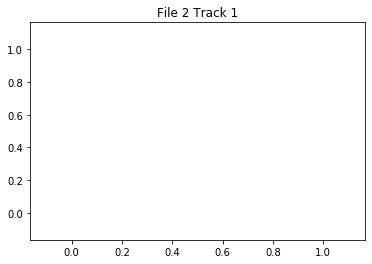

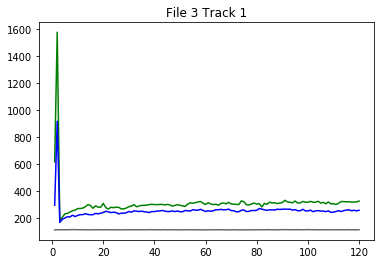

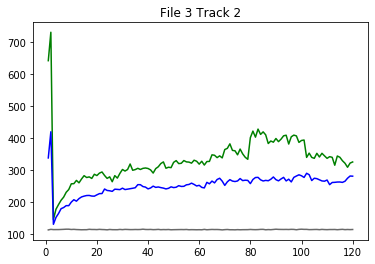

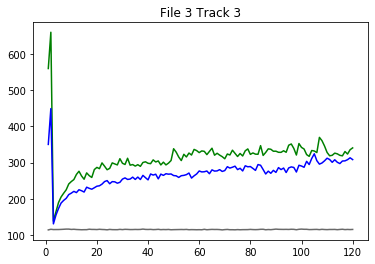

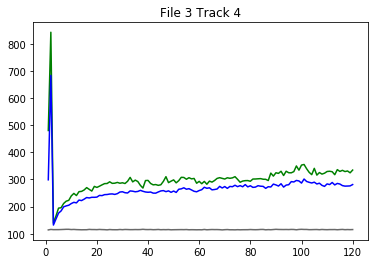

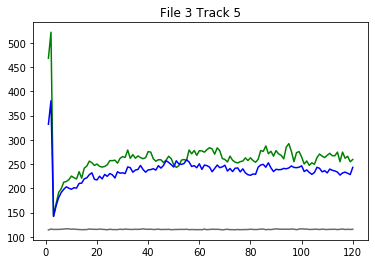

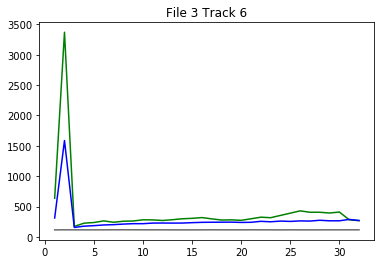

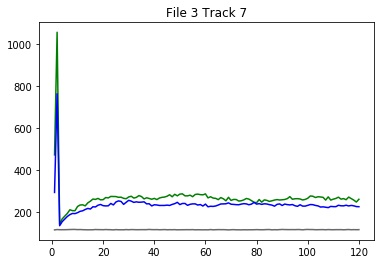

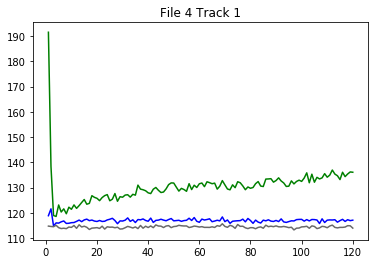

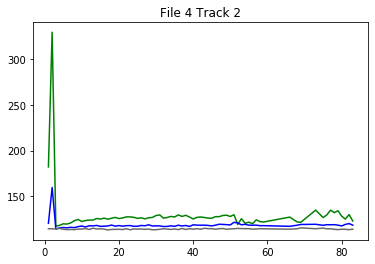

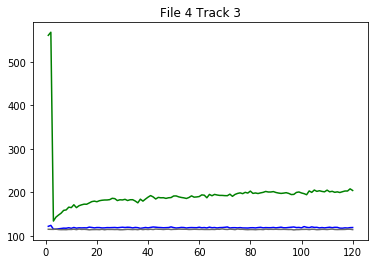

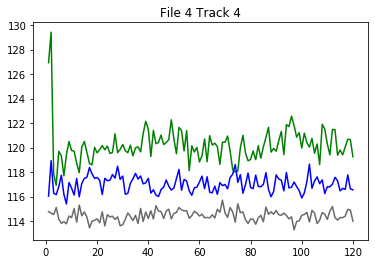

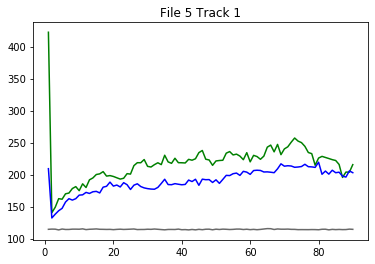

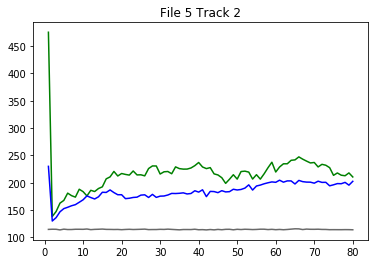

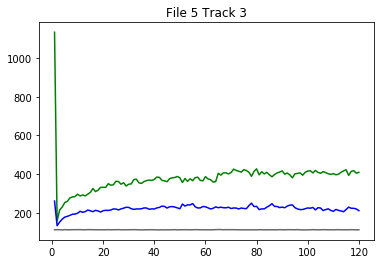

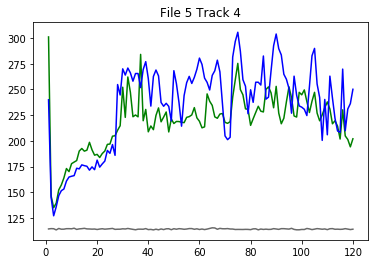

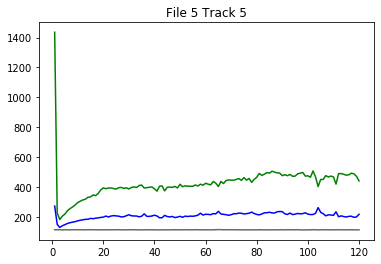

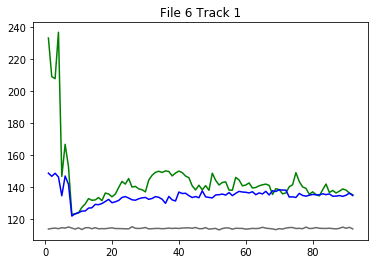

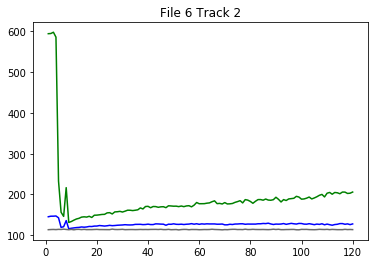

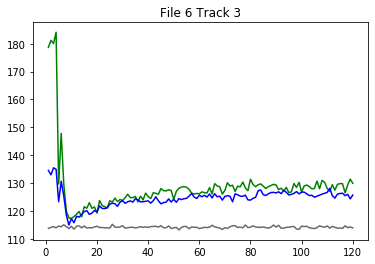

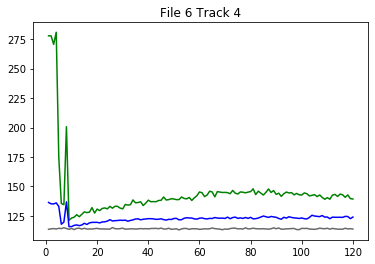

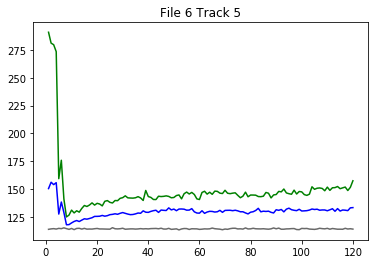

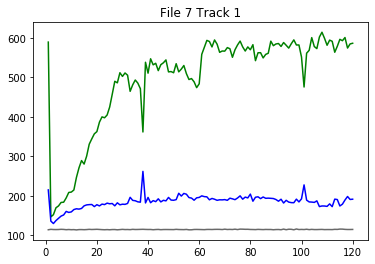

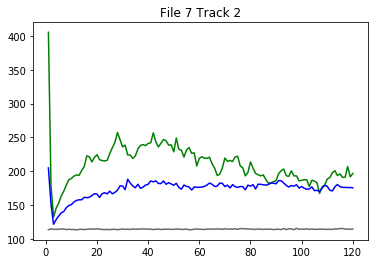

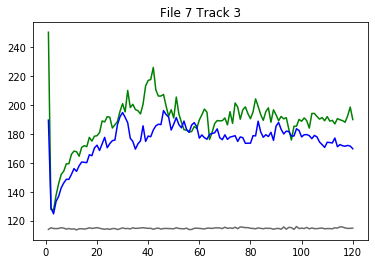

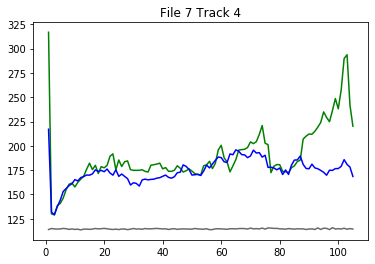

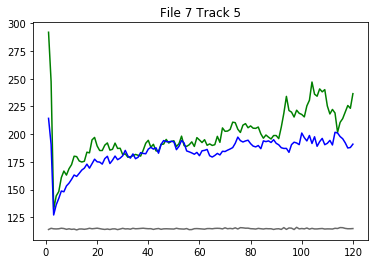

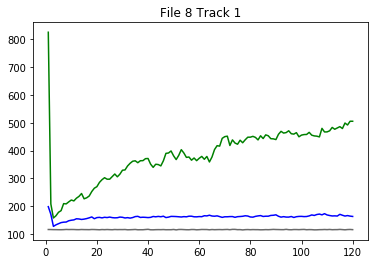

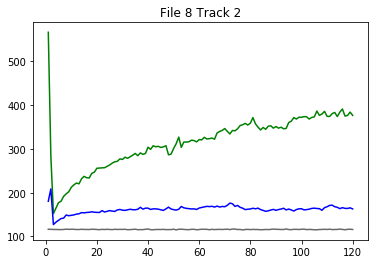

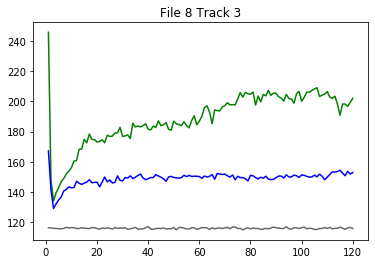

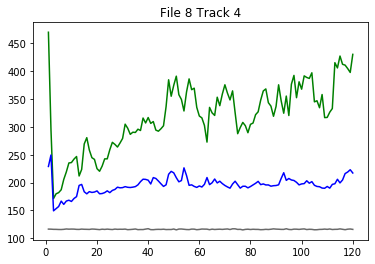

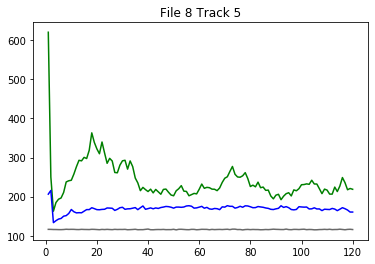

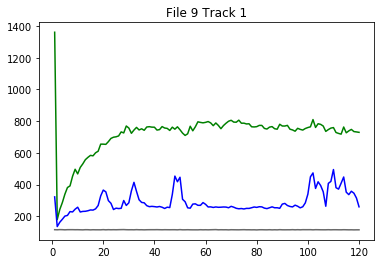

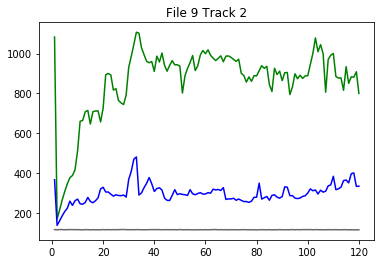

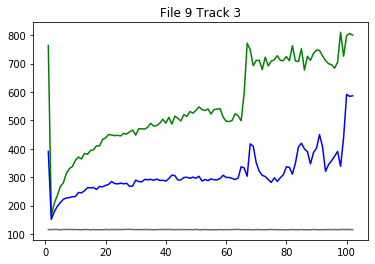

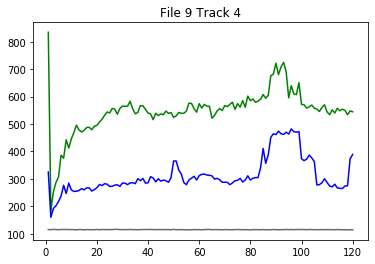

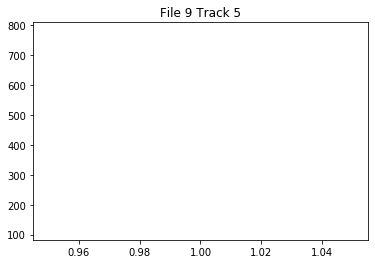

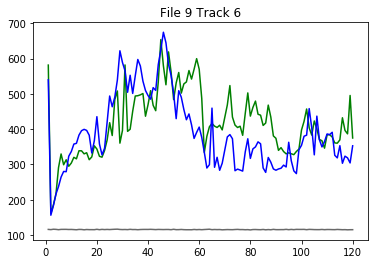

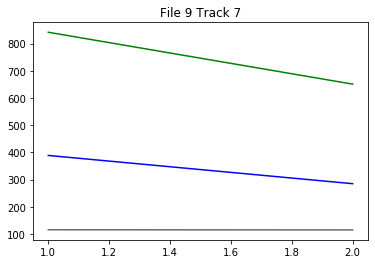

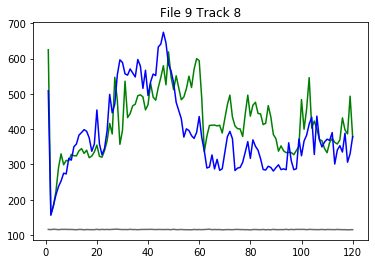

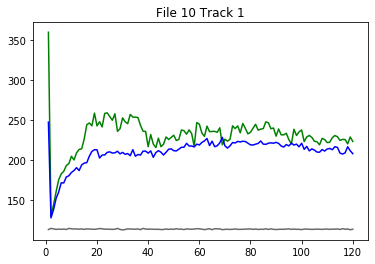

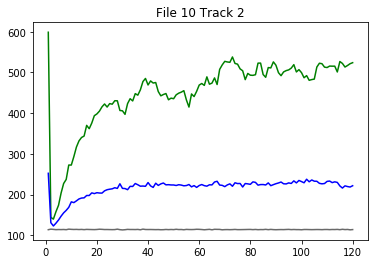

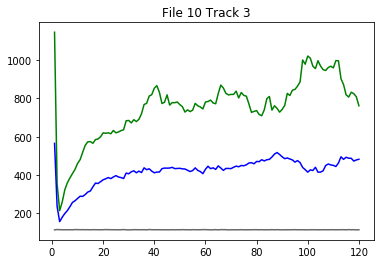

In [24]:
#Plot with background

#Use zip to iterate through the traces we want.
for file_number, track_number in zip(summary_df.File, summary_df.Track):
    
    idx = np.where((main_df.File.eq(file_number)) & (main_df.Track.eq(track_number)))

    track_data = main_df.loc[idx]    

    plt.plot(track_data.Frame, track_data.focus_intensities, c='g');
    plt.plot(track_data.Frame, track_data.spot_intensities, c='b');
    plt.plot(track_data.Frame, track_data["Mean(Bgd)"], c='dimgrey');
    plt.title("File "+ str(file_number) + " Track "+ str(track_number))
    plt.show()

File  Track  Frame    X    Y  focus_intensities  spot_intensities  \
4936     9      5      1  241  243            775.577           397.372   

                                       Filename_x              Experiment  \
4936  EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv  EML4-ALKv3_Box_FRAP_05   

      Mean(Bgd)                          Filename_y  
4936    115.785  EML4-ALKv3_Box_FRAP_05_Results.csv

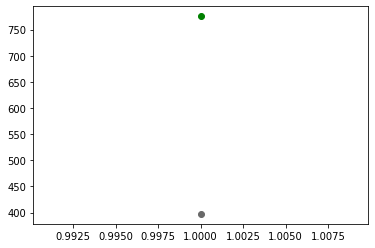

In [25]:
# Plot individual trace
file_number = 9
track_number = 5

data = main_df[main_df.File.eq(file_number) & main_df.Track.eq(track_number)]
plt.scatter(data.Frame, data.focus_intensities, c='g');
plt.scatter(data.Frame, data.spot_intensities, c='dimgrey');
data
##Some traces only have one or two data points

In [26]:
clean_idx = np.where((summary_df["Frame"]>=120) & (summary_df["File"]!=1) & (summary_df["File"]!=5) & (summary_df["File"]!=6))

clean_summary_df = summary_df.loc[clean_idx]
clean_summary_df.sort_values(by=['File', 'Track', 'Frame']).reset_index(drop=True)
clean_summary_df

File  Track  Frame    X    Y  focus_intensities  spot_intensities  \
0      0      1    120  231  269            195.701           125.750   
1      0      2    120  274  262            160.918           134.974   
2      0      3    120  279  250            171.711           132.036   
3      0      4    120  250  239            149.021           129.403   
4      0      5    120  230  294            140.887           127.097   
9      3      1    120  229  236           1575.113           916.883   
10     3      2    120  257  279            731.258           420.556   
11     3      3    120  274  276            659.196           448.643   
12     3      4    120  280  258            842.928           683.689   
13     3      5    120  235  284            521.887           380.561   
15     3      7    120  238  254           1054.701           761.908   
16     4      1    120  239  224            191.464           121.607   
18     4      3    120  262  291            568.216           123.689   
19     4      4    120  220  280            129.423           118.929   
30     7      1    120  236  244            614.093           261.781   
31     7      2    120  262  249            405.258           205.066   
32     7      3    120  274  237            250.278           196.082   
34     7      5    120  275  269            291.990           214.276   
35     8      1    120  256  270            825.557           198.587   
36     8      2    120  281  253            566.557           208.668   
37     8      3    120  288  286            245.680           167.240   
38     8      4    120  240  238            469.670           249.367   
39     8      5    120  278  228            620.072           215.806   
40     9      1    120  243  263           1360.598           494.949   
41     9      2    120  255  260           1106.742           480.556   
43     9      4    120  290  261            834.299           482.102   
45     9      6    120  255  245            654.010           674.867   
47     9      8    120  257  246            625.247           674.867   
48    10      1    120  233  287            359.567           247.505   
49    10      2    120  260  261            598.804           252.286   
50    10      3    120  279  240           1145.856           565.520   

                                       Filename  ALKv1  ALKv3  
0   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
1   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
2   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
3   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
4   EML4-ALKv1_Box_FRAP_03_Tracking_Results.csv   True  False  
9   EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
10  EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
11  EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
12  EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
13  EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
15  EML4-ALKv1_Box_FRAP_06_Tracking_Results.csv   True  False  
16  EML4-ALKv1_Box_FRAP_07_Tracking_Results.csv   True  False  
18  EML4-ALKv1_Box_FRAP_07_Tracking_Results.csv   True  False  
19  EML4-ALKv1_Box_FRAP_07_Tracking_Results.csv   True  False  
30  EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv  False   True  
31  EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv  False   True  
32  EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv  False   True  
34  EML4-ALKv3_Box_FRAP_02_Tracking_Results.csv  False   True  
35  EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
36  EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
37  EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
38  EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
39  EML4-ALKv3_Box_FRAP_03_Tracking_Results.csv  False   True  
40  EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv  False   True  
41  EML4-ALKv3_Box_FRAP_05_Tracking_Results.csv  False   True  
43 

In [27]:
## This is the way to iterate through the clean tracks
# for file_number, track_number in zip(clean_summary_df.File, clean_summary_df.Track):
#     print(file_number, track_number)

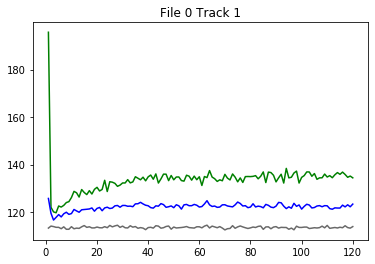

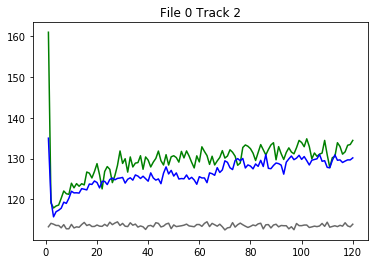

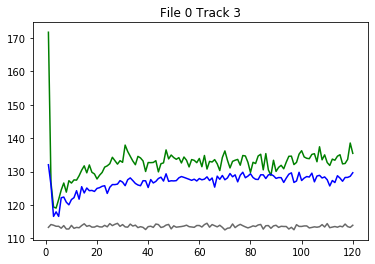

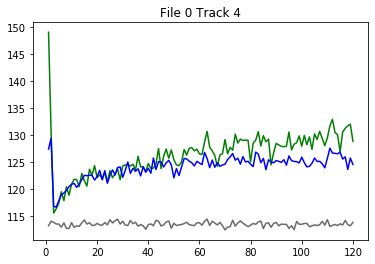

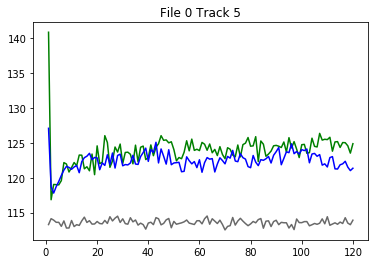

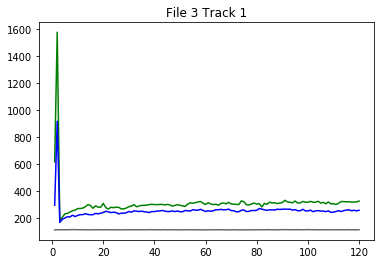

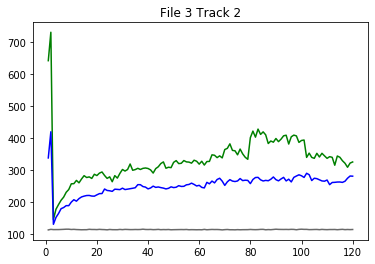

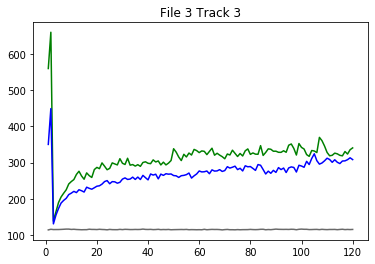

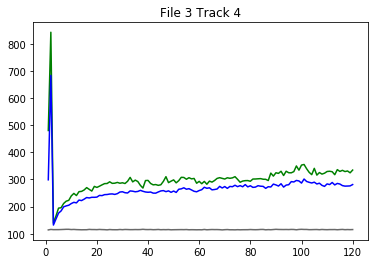

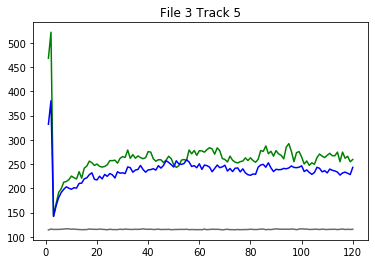

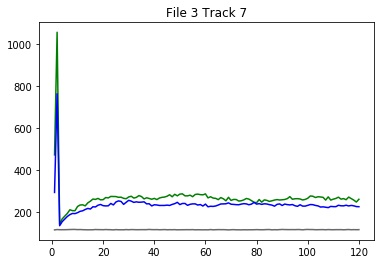

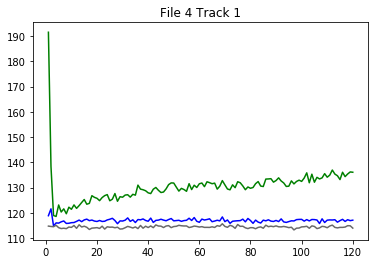

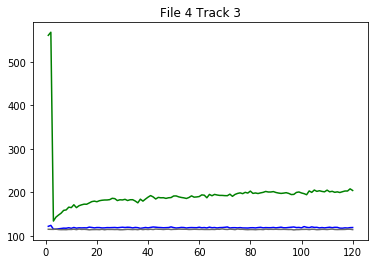

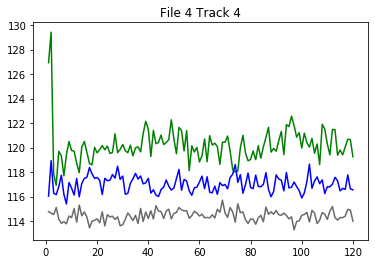

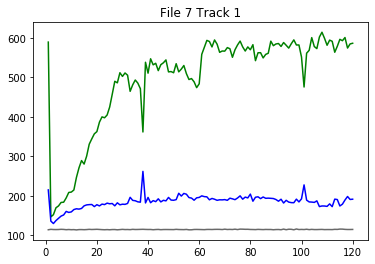

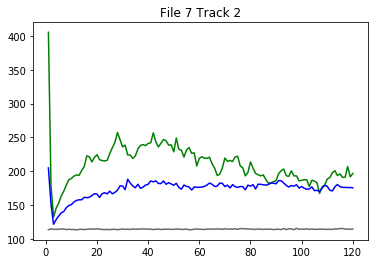

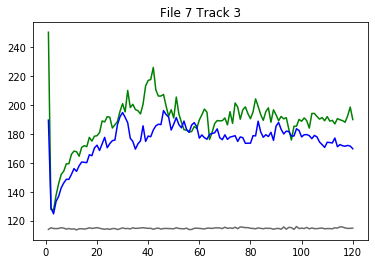

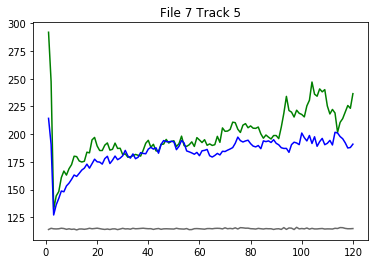

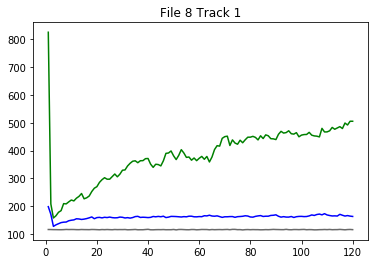

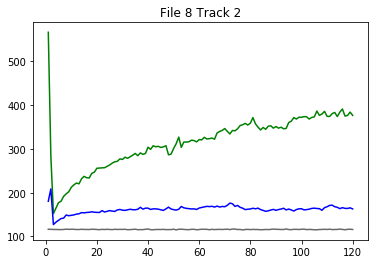

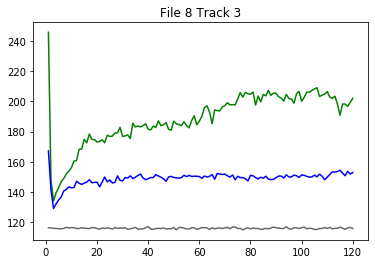

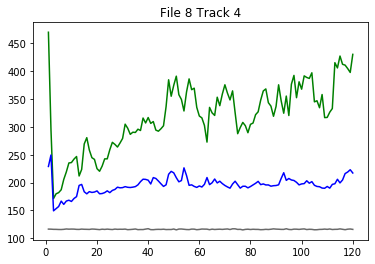

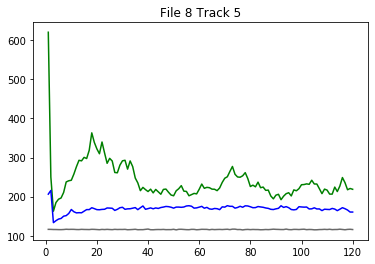

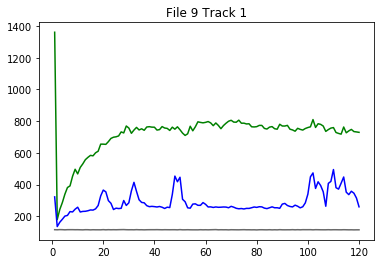

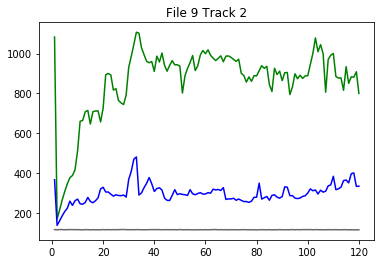

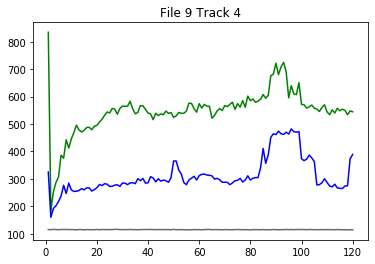

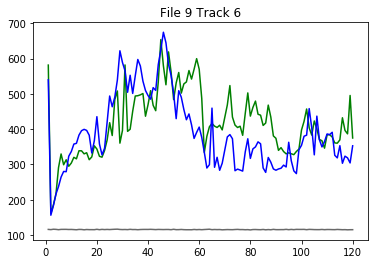

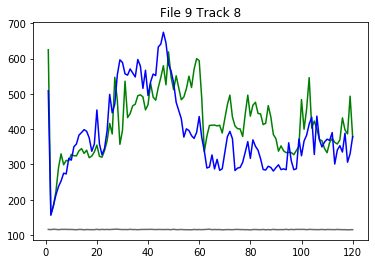

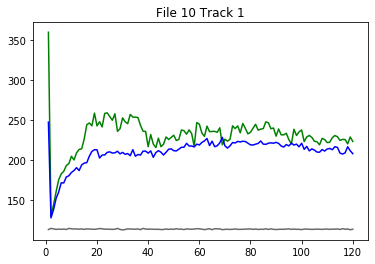

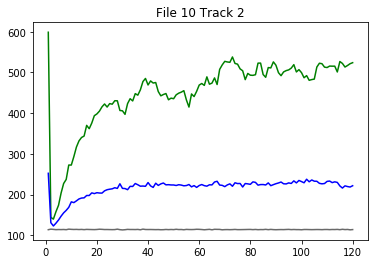

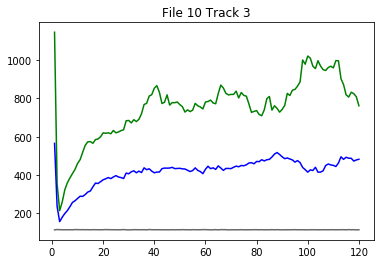

In [28]:
## Filter out the crappy files/ traces

## Use the summary_df

#Use zip to iterate through the traces we want.
for file_number, track_number in zip(clean_summary_df.File, clean_summary_df.Track):
    
    idx = np.where((main_df.File.eq(file_number)) & (main_df.Track.eq(track_number)))

    track_data = main_df.loc[idx]   

    plt.plot(track_data.Frame, track_data.focus_intensities, c='g');
    plt.plot(track_data.Frame, track_data.spot_intensities, c='b');
    plt.plot(track_data.Frame, track_data["Mean(Bgd)"], c='dimgrey');
    plt.title("File "+ str(file_number) + " Track "+ str(track_number))
    plt.show()

## Normalize to background

In [29]:
def prebleach(df):
    
    #choose the first measurement as the prebleach condition 'pre'
    pre = df.iloc[0,1:]
    pre = pd.DataFrame(pre).T
    
    return pre

def subtract_background(df):
    
    #subtract the background column
    sub = df.subtract(df['Mean(Bgd)'], axis=0)
    sub.Frame = df.Frame
    sub.drop(columns='Mean(Bgd)', inplace=True)
    return sub.reset_index(drop=True)

def normalise(sub):
    
    pre = prebleach(sub)

    norm = pd.DataFrame()

    for key, value in pre.to_dict(orient='index')[0].items():
    #     print(key, value)

        norm[str(key)] = sub.loc[:, key].divide(value)

    norm['Frame'] = sub['Frame']
    
    return norm

def get_FRAP(norm, t0):
    
    FRAP = norm[t0:].copy()
#     FRAP['Time'] = (FRAP['Frame']-t0)
    
    return FRAP

#Get the timescales right.
def set_time(df, t0, fps):
    
    df['Time'] = (df.Frame - t0)*1/fps

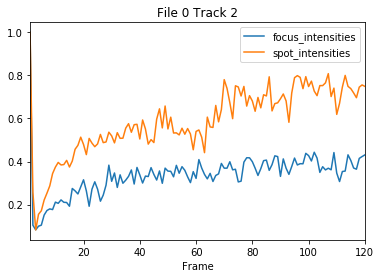

In [30]:
# Try a single example
file_number = 0
track_number = 2


file_data = main_df[main_df.File.eq(file_number)]
track_data = file_data[file_data.Track.eq(track_number)]

# print(file_number, track_number)

df = track_data.loc[:,["Frame", "focus_intensities", "spot_intensities", "Mean(Bgd)"]]

sub = subtract_background(df)
norm = normalise(sub)

norm.plot(x='Frame');
plt.title("File "+ str(file_number) + " Track "+ str(track_number))
plt.show()

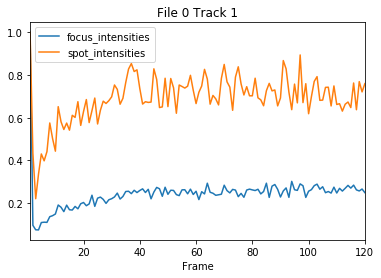

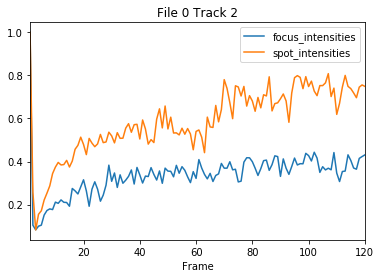

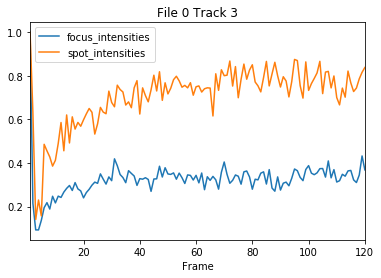

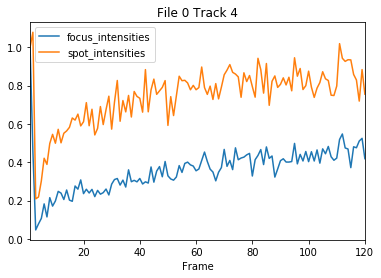

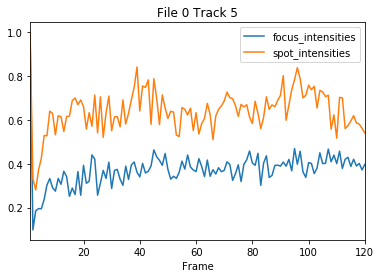

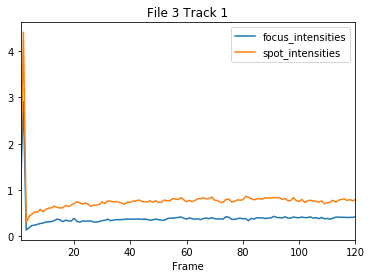

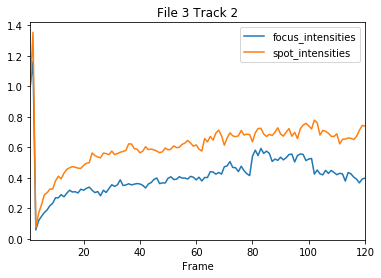

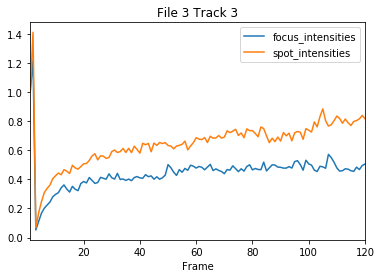

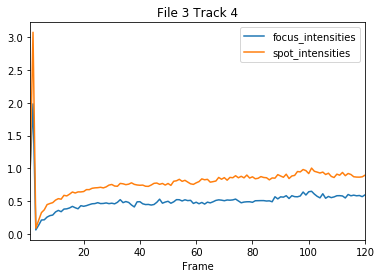

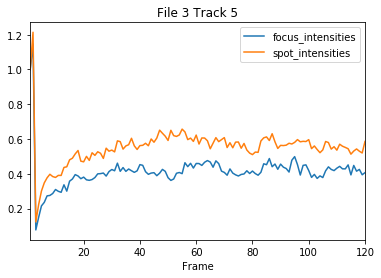

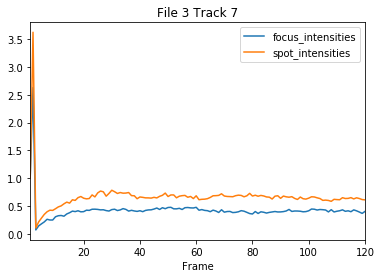

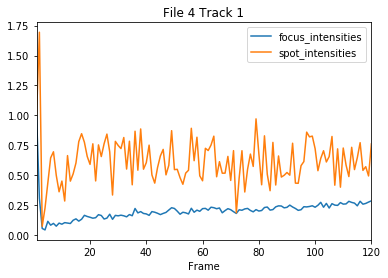

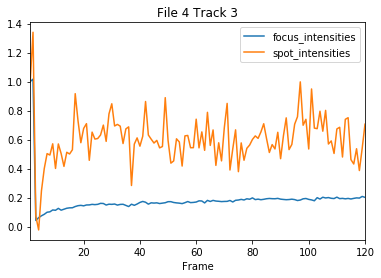

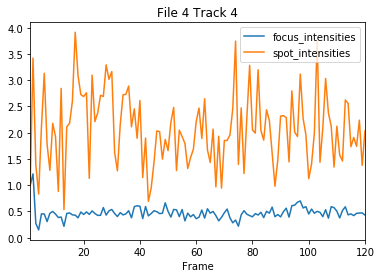

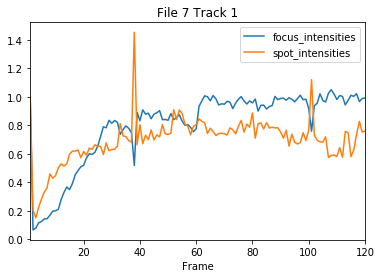

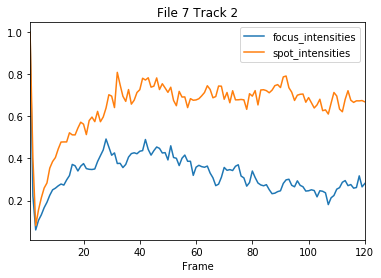

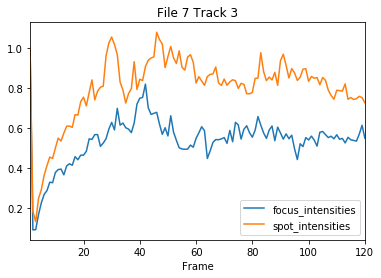

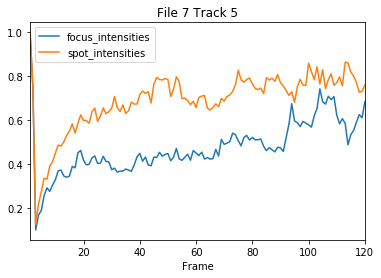

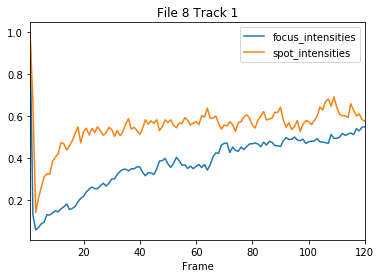

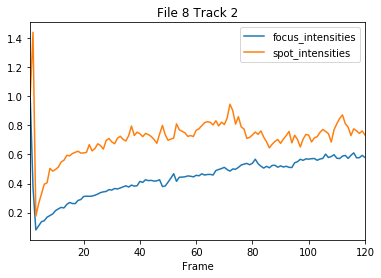

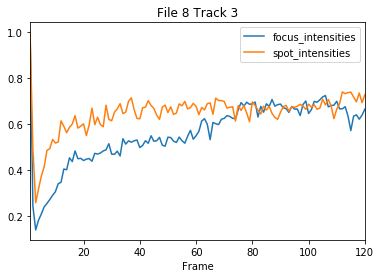

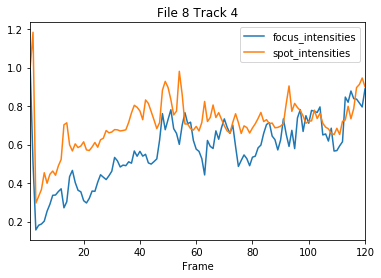

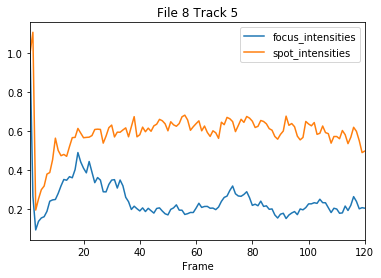

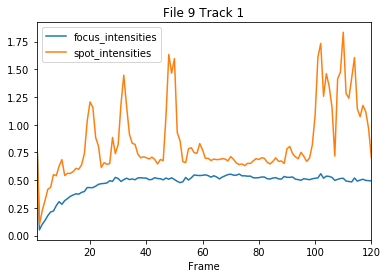

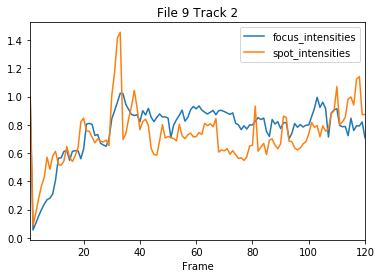

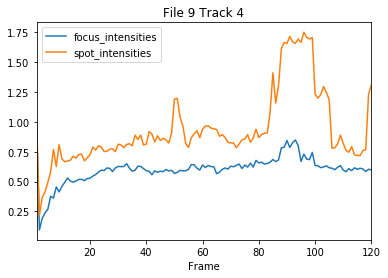

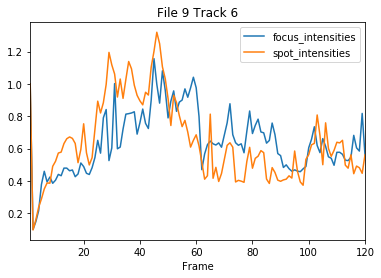

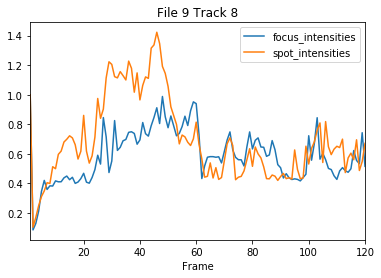

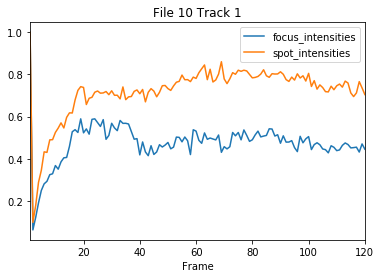

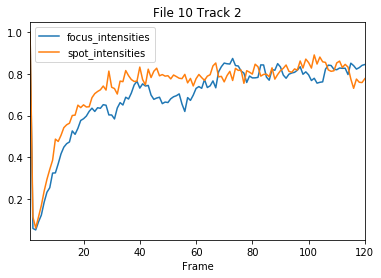

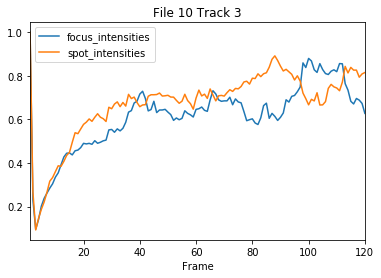

In [31]:
#Use zip to iterate through the traces we want.
for file_number, track_number in zip(clean_summary_df.File, clean_summary_df.Track):
    
    idx = np.where((main_df.File.eq(file_number)) & (main_df.Track.eq(track_number)))

    track_data = main_df.loc[idx]
    
    ## Calculate and Plot FRAP for these traces
    df = track_data.loc[:,["Frame", "focus_intensities", "spot_intensities", "Mean(Bgd)"]]

    sub = subtract_background(df)
    norm = normalise(sub)

    norm.plot(x='Frame');
    plt.title("File "+ str(file_number) + " Track "+ str(track_number))
    plt.show()

## Trim at t0 for each file.

In [32]:
# Zip filenames and t0 values for look up
t0_dict = dict(zip(background_files, t0_list))

In [33]:
# Zip filenames and fps for look up
fps_dict =dict(zip(background_files, fps_list))

In [34]:
idx = np.where((main_df.File.eq(0)) & (main_df.Track.eq(2)))

track_data = main_df.loc[idx]
track_data.Filename_y

120    EML4-ALKv1_Box_FRAP_03_Results.csv
121    EML4-ALKv1_Box_FRAP_03_Results.csv
122    EML4-ALKv1_Box_FRAP_03_Results.csv
123    EML4-ALKv1_Box_FRAP_03_Results.csv
124    EML4-ALKv1_Box_FRAP_03_Results.csv
                      ...                
235    EML4-ALKv1_Box_FRAP_03_Results.csv
236    EML4-ALKv1_Box_FRAP_03_Results.csv
237    EML4-ALKv1_Box_FRAP_03_Results.csv
238    EML4-ALKv1_Box_FRAP_03_Results.csv
239    EML4-ALKv1_Box_FRAP_03_Results.csv
Name: Filename_y, Length: 120, dtype: object

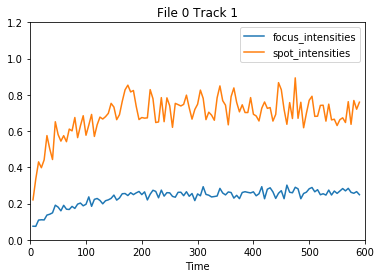

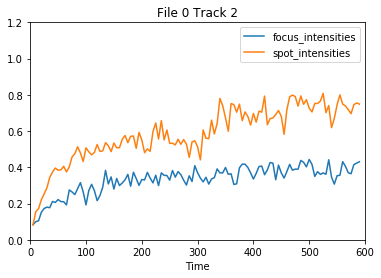

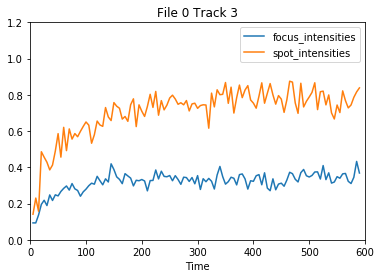

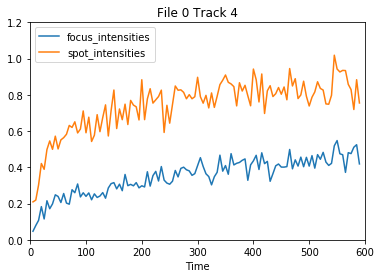

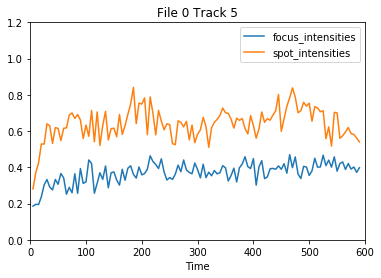

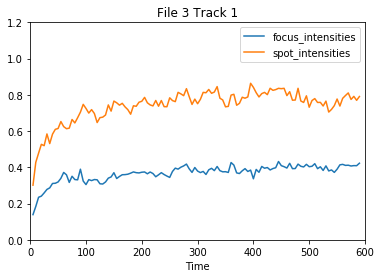

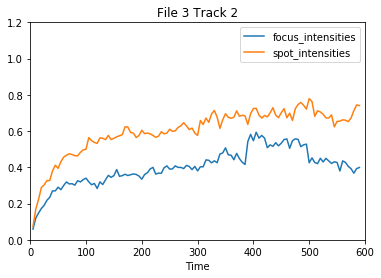

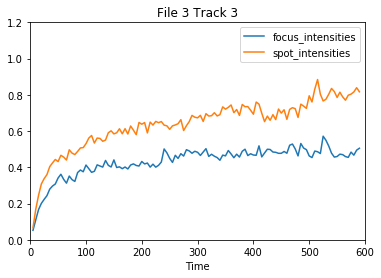

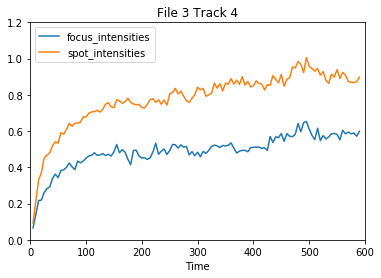

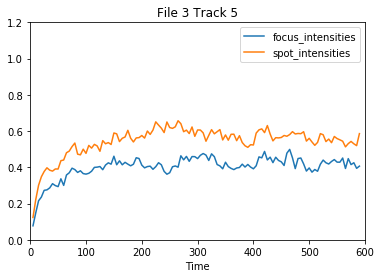

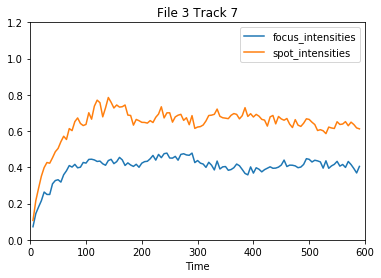

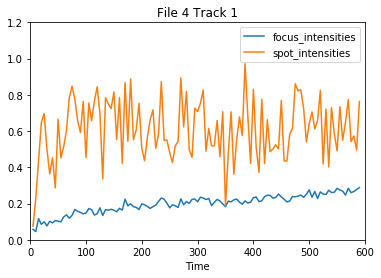

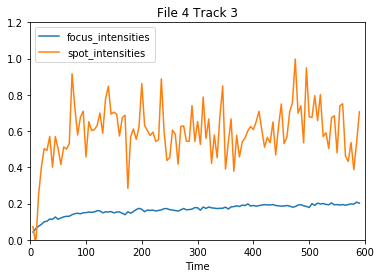

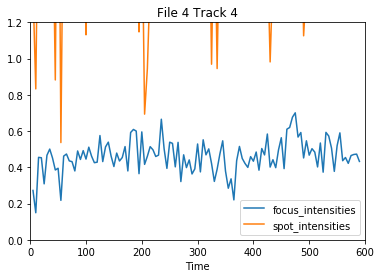

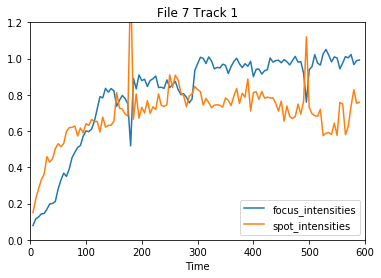

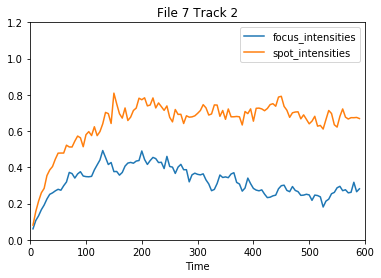

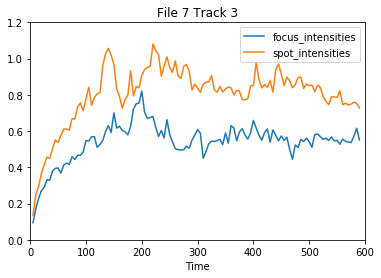

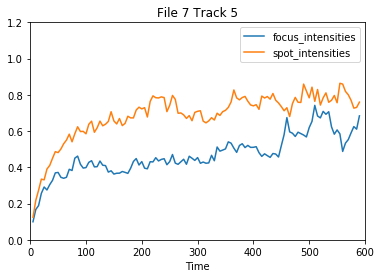

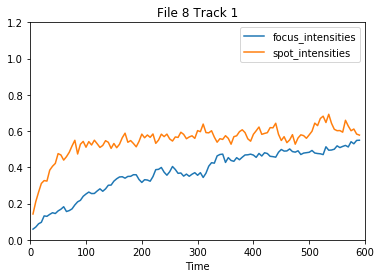

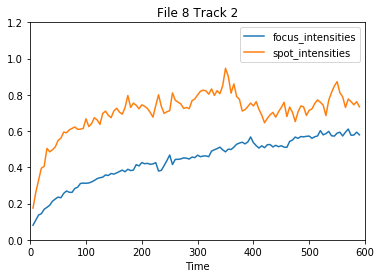

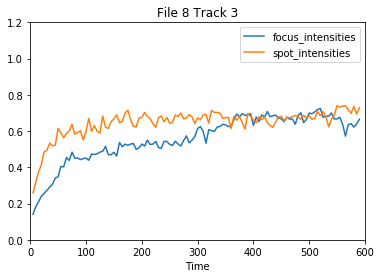

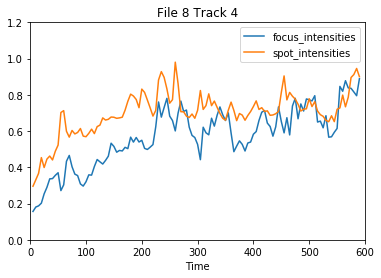

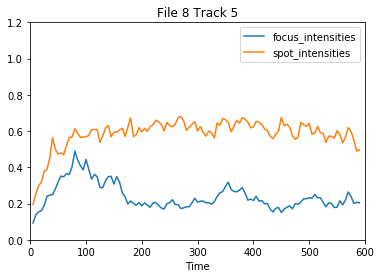

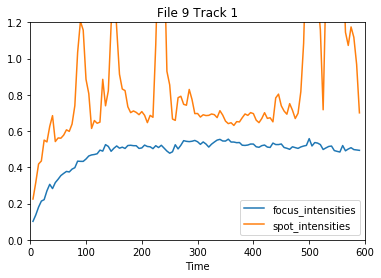

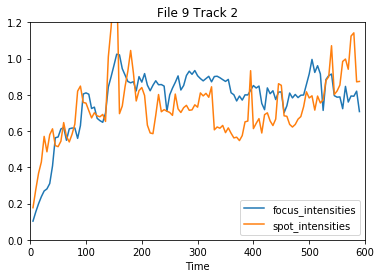

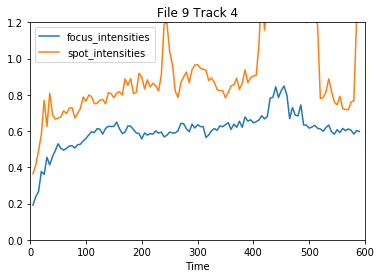

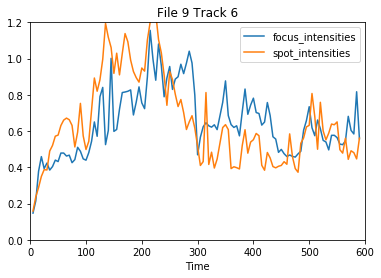

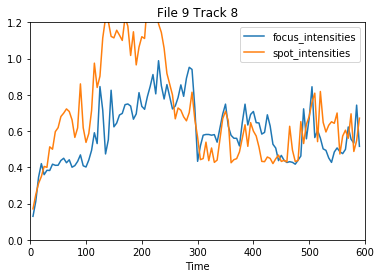

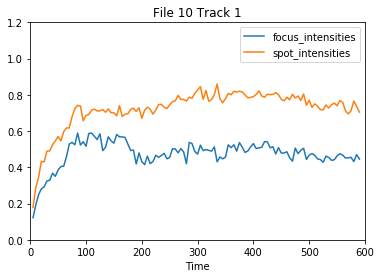

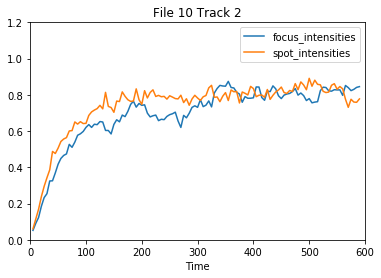

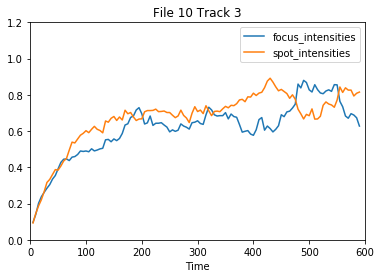

In [35]:
# Pull out a list of FRAP curves corresponding to clean_summary_df
frap_df_list=list()

## Plot FRAP data for all traces.

#Use zip to iterate through the traces we want.
for file_number, track_number in zip(clean_summary_df.File, clean_summary_df.Track):
    
    idx = np.where((main_df.File.eq(file_number)) & (main_df.Track.eq(track_number)))

    track_data = main_df.loc[idx]
    
    ## Calculate and Plot FRAP for these traces
    df = track_data.loc[:,["Frame", "focus_intensities", "spot_intensities", "Mean(Bgd)"]]

    sub = subtract_background(df)
    norm = normalise(sub)
    
    ## Get filename 'key'
    filename = track_data.Filename_y.unique()[0]
    
    ## Look up t0
    t0 = t0_dict[filename]
    
    ## Look up fps
    fps = fps_dict[filename]
    
    ## Set Time
    set_time(norm, t0, fps)
    
    FRAP = get_FRAP(norm, t0)
    
    # Pull out a list of frap_df_list corresponding to clean_summary_df
    frap_df_list.append(FRAP)
    
    FRAP.drop(columns=["Frame"]).plot(x='Time');
    plt.title("File "+ str(file_number) + " Track "+ str(track_number))
    plt.xlim(0,600)
    plt.ylim(0,1.2)
    plt.show()

In [36]:
frap_df_list[0]

focus_intensities  spot_intensities  Frame   Time
2             0.074920          0.220529      3    5.0
3             0.074350          0.335766      4   10.0
4             0.108904          0.430072      5   15.0
5             0.110530          0.397835      6   20.0
6             0.109681          0.441139      7   25.0
..                 ...               ...    ...    ...
115           0.284054          0.762310    116  570.0
116           0.261851          0.637209    117  575.0
117           0.256791          0.768805    118  580.0
118           0.265855          0.720690    119  585.0
119           0.248905          0.759423    120  590.0

[118 rows x 4 columns]

In [37]:
# Overlay all EML4-ALKv1 FRAP curves

In [38]:
idx = np.where(clean_summary_df.ALKv1)

for frap_experiment in idx:
    print(frap_experiment)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


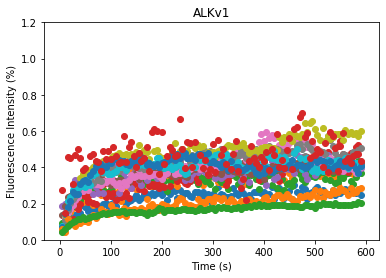

In [39]:
#Get the index of ALKv1 FRAPs
idx = np.where(clean_summary_df.ALKv1)

for frap_experiment in np.nditer(idx):
    FRAP = frap_df_list[frap_experiment]

    plt.scatter(FRAP.Time, FRAP.focus_intensities)
    
plt.title('ALKv1');
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0,1.2);

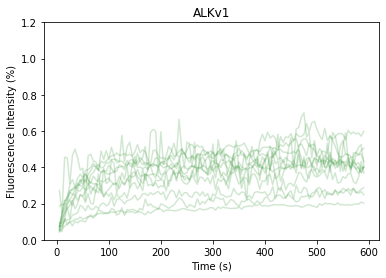

In [54]:
#Exclude file 1 = EML4-ALKv1_Box_FRAP_04_Tracking_Results.csv

#Get the index of ALKv1 FRAPs
idx = np.where(clean_summary_df.ALKv1)

for frap_experiment in np.nditer(idx):
    
    if (frap_experiment !=1 and frap_experiment !=5):
    
        FRAP = frap_df_list[frap_experiment]

        plt.plot(FRAP.Time, FRAP.focus_intensities, c="forestgreen", alpha=0.2)
    
plt.title('ALKv1');
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0,1.2);
plt.savefig('Figures/ALKv1.pdf', format='pdf')

In [41]:
frap_df_list[5]

focus_intensities  spot_intensities  Frame   Time
2             0.138926          0.301438      3    5.0
3             0.183926          0.427456      4   10.0
4             0.234615          0.477991      5   15.0
5             0.241133          0.526821      6   20.0
6             0.258810          0.519430      7   25.0
..                 ...               ...    ...    ...
115           0.411680          0.810563    116  570.0
116           0.407294          0.774672    117  575.0
117           0.409407          0.791504    118  580.0
118           0.408945          0.769778    119  585.0
119           0.422672          0.790762    120  590.0

[118 rows x 4 columns]

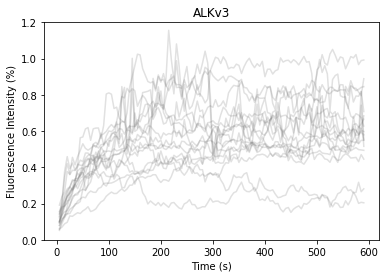

In [55]:
#Get the index of ALKv1 FRAPs
idx = np.where(clean_summary_df.ALKv3)

for frap_experiment in np.nditer(idx):
    FRAP = frap_df_list[frap_experiment]

    plt.plot(FRAP.Time, FRAP.focus_intensities, c="dimgrey", alpha=0.2)
    
plt.title('ALKv3');
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0,1.2);
plt.savefig('Figures/ALKv3.pdf', format='pdf')

In [43]:
## Can we overlay the mean?

In [44]:
## Need to start with clean data. drop files with different fps or timelapse length

In [45]:
def mean_frap(frap_df_list, nan_value):
    
    ## # solution 1 (fast)
    frap_df = pd.concat(frap_df_list, join='outer', axis=1).fillna(nan_value)

    frap_df.drop(columns=["Frame", "spot_intensities"], inplace=True)

    frap_df = frap_df.T
    frap_df = frap_df.drop_duplicates().T

    time  = frap_df["Time"].reset_index(drop=True)
    mean  = frap_df.drop(columns=["Time"]).mean(axis=1).reset_index(drop=True)
    std   = frap_df.drop(columns=["Time"]).std(axis=1).reset_index(drop=True)
    count = frap_df.drop(columns=["Time"]).count(axis=1).reset_index(drop=True)
    
    se    = std/np.sqrt(count)
    
    return time, mean, std, se

In [46]:
# Get mean for ALKv1
ALKv1 = [frap_df_list[i] for i in np.nditer(np.where(clean_summary_df.ALKv1))]
ALKv3 = [frap_df_list[i] for i in np.nditer(np.where(clean_summary_df.ALKv3))]

In [47]:
ALKv1_time, ALKv1_mean, ALKv1_std, ALKv1_se = mean_frap(ALKv1, np.nan)
ALKv3_time, ALKv3_mean, ALKv3_std, ALKv3_se = mean_frap(ALKv3, np.nan) #There is an unremoved redundancy here in ALKv3_time

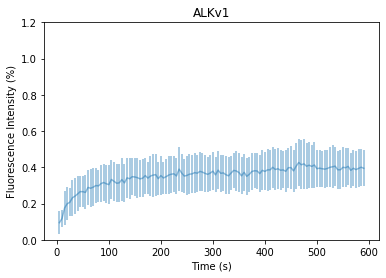

In [48]:
plt.errorbar(ALKv1_time, ALKv1_mean, yerr=ALKv1_std, alpha=0.5);

plt.title('ALKv1');
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0, 1.2);

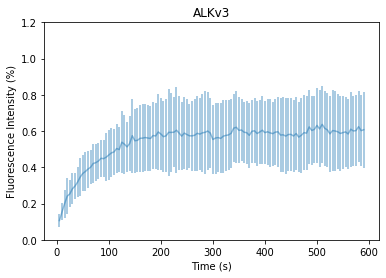

In [49]:
plt.errorbar(ALKv1_time, ALKv3_mean, yerr=ALKv3_std, alpha=0.5);

plt.title('ALKv3');
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0,1.2);

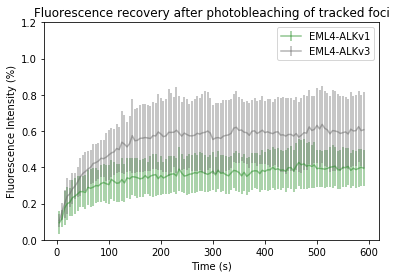

In [60]:
plt.errorbar(ALKv1_time, ALKv1_mean, yerr=ALKv1_std, c='forestgreen', alpha=0.5);
plt.errorbar(ALKv1_time, ALKv3_mean, yerr=ALKv3_std, c='dimgrey', alpha=0.5);

plt.title("Fluorescence recovery after photobleaching of tracked foci");
plt.legend(labels=["EML4-ALKv1", "EML4-ALKv3"]);
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0,1.2);
plt.savefig('Figures/FRAP_with_stdev.pdf', format='pdf');

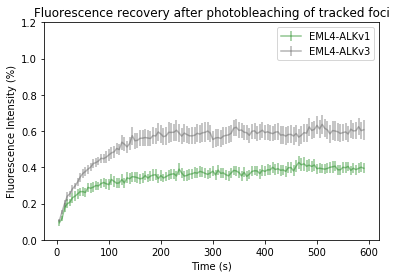

In [61]:
plt.errorbar(ALKv1_time, ALKv1_mean, yerr=ALKv1_se, c='forestgreen', alpha=0.5);
plt.errorbar(ALKv1_time, ALKv3_mean, yerr=ALKv3_se, c='dimgrey', alpha=0.5);

plt.title("Fluorescence recovery after photobleaching of tracked foci")
plt.legend(labels=["EML4-ALKv1", "EML4-ALKv3"])
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0,1.2);
plt.savefig('Figures/FRAP_with_se.pdf', format='pdf')

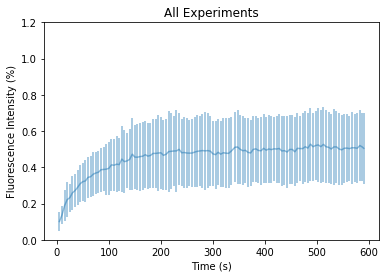

In [62]:
nan_value = np.nan

## # solution 1 (fast)
result_1 = pd.concat(frap_df_list, join='outer', axis=1).fillna(nan_value)

result_1.drop(columns=["Frame", "spot_intensities"], inplace=True)
result_1

result_1 = result_1.T
result_1 = result_1.drop_duplicates().T

time = result_1["Time"].mean(axis=1)
mean = result_1.drop(columns=["Time"]).mean(axis=1)
std = result_1.drop(columns=["Time"]).std(axis=1)

plt.errorbar(time, mean, yerr=std, alpha=0.5);

plt.title('All Experiments');
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0,1.2);

## Fit data with biexponential functions.

In [63]:
def bi_exp_curve(x, A, B, c, d, h):
    
    y = h - A*(np.exp(-x/c))-B*(np.exp(-x/d))
    
    return y

In [64]:
# Fit bi exp
def fit_bi_exp(x, y0, initial_parameters, bounds):

    parameters, error = optimize.curve_fit(f = bi_exp_curve, xdata=x, ydata=y0, p0=initial_parameters, bounds=bounds)

    A, B, c, d, h = parameters

    fit = bi_exp_curve(x, A, B, c, d, h)
    
    return fit, parameters , error

In [65]:
# How do I get the estimated Mobile Fractions for each plot?
def get_mobile_from_fit(y1):
    
    v  = y1.max()
    print('v = ', v)
    F0 = y1.min()
    print('F0 = ', F0)
    M  = (v - F0)/(1-F0)
    
    return M

In [66]:
#Defaults
A = 0.4
B = 0.36
c = 0.1
d = 99
h = 0.45

v =  0.2616925530790322
F0 =  0.07672563195868386


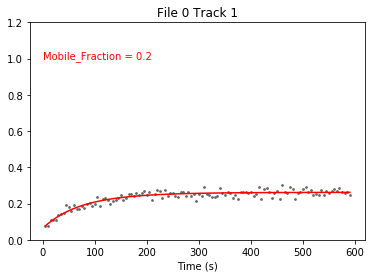

v =  0.3793182537098293
F0 =  0.07240686548981651


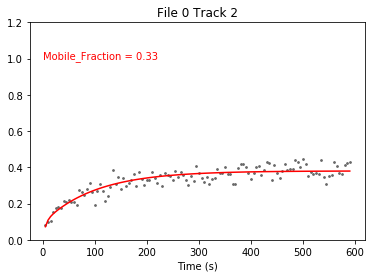

v =  0.3396466819985483
F0 =  0.07848947763184863


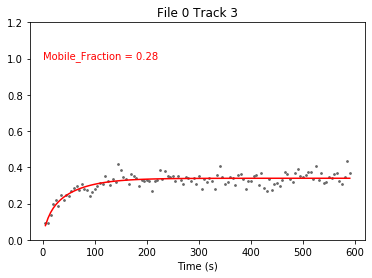

v =  0.41171525861312275
F0 =  0.04732649238288461


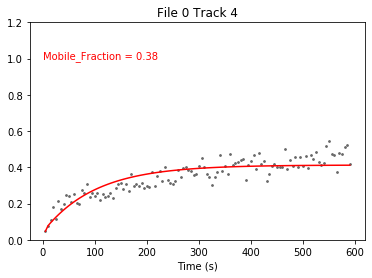

v =  0.39626741195481063
F0 =  0.1692664231134096


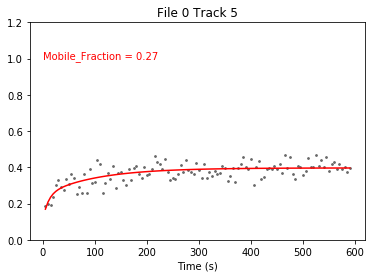

v =  0.3929208641178902
F0 =  0.1350182278023761


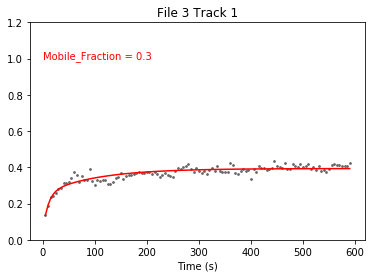

v =  0.4578720180736617
F0 =  0.058920448770864164


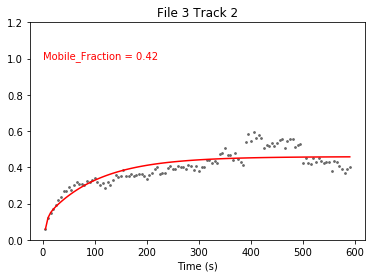

v =  0.48186472755216997
F0 =  0.04562884073401002


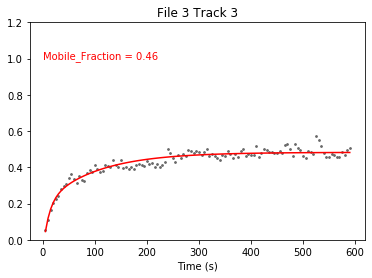

v =  0.5437906916395304
F0 =  0.06547227987298682


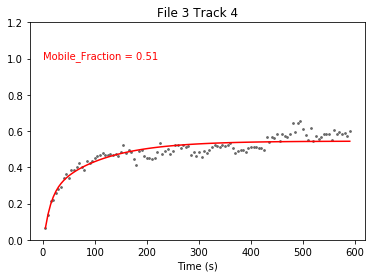

v =  0.42592702738378235
F0 =  0.07444195383524327


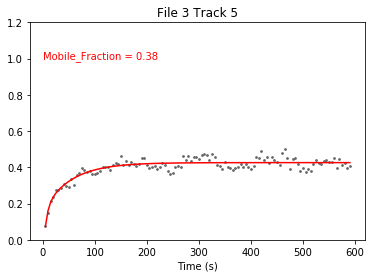

v =  0.42157698328522236
F0 =  0.07221054110339142


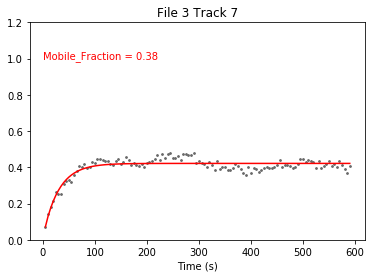

v =  0.23110674512373927
F0 =  0.040785258598737065


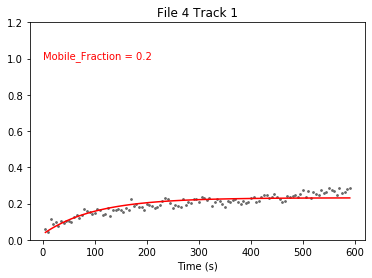

v =  0.18637072463432594
F0 =  0.07022061058869268


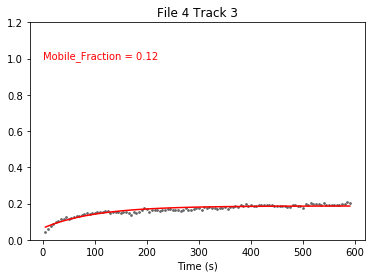

v =  0.474059668932685
F0 =  0.22748038133448512


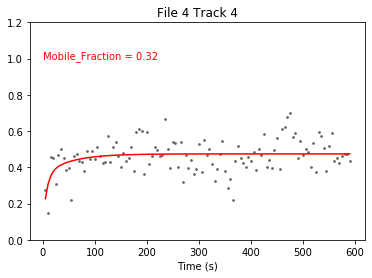

v =  0.9759176088927034
F0 =  -0.023551851830900028


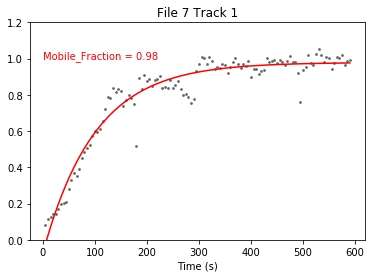

v =  0.33455997865705156
F0 =  0.03660384597001287


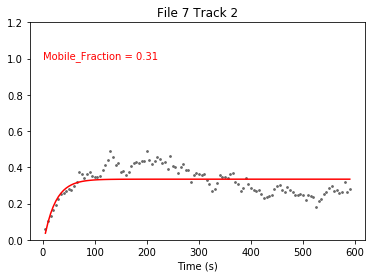

v =  0.5769754526568135
F0 =  0.09452770497035101


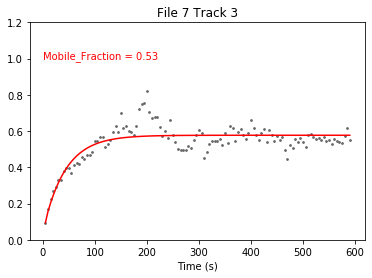

v =  0.5250503090129642
F0 =  0.0966379712433611


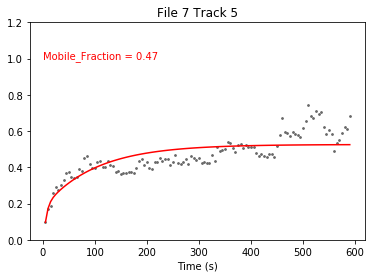

v =  0.454053724687998
F0 =  -0.016686500707842167


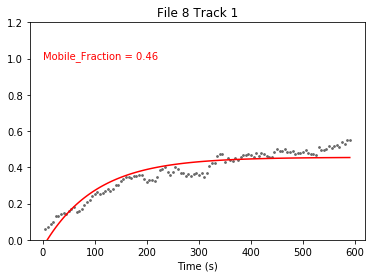

v =  0.5211173732810116
F0 =  0.0391774771922459


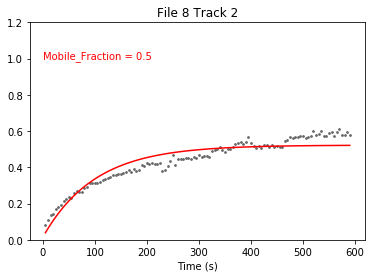

v =  0.6413431202994013
F0 =  0.1405076077805188


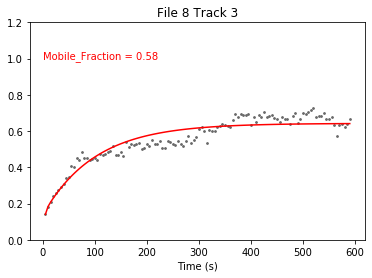

v =  0.6648866294328161
F0 =  0.10310611868584574


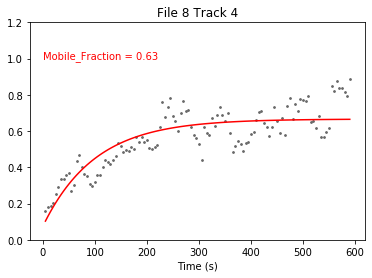

v =  0.24360422470881832
F0 =  0.07560555861566316


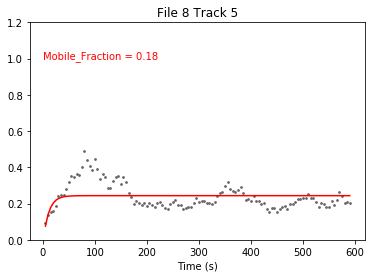

v =  0.5224889268918669
F0 =  0.09948545493282374


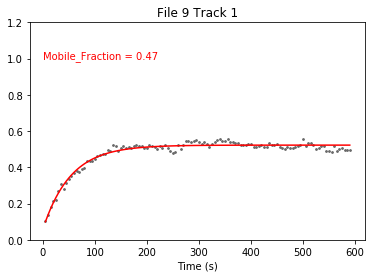

v =  0.8466851568639622
F0 =  0.03519323424839915


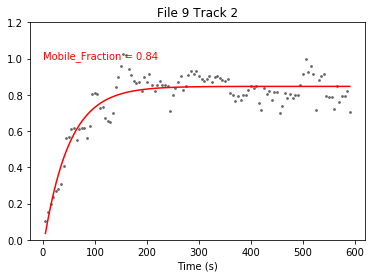

v =  0.6492221590969612
F0 =  0.17391518092187344


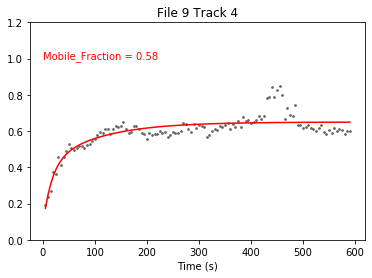

v =  0.693776999566395
F0 =  0.146516652053853


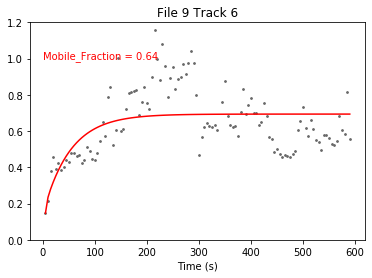

v =  0.6350798867873731
F0 =  0.1291045789033673


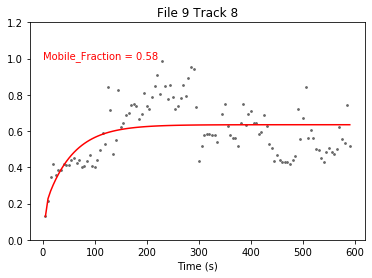

v =  0.49180267028567315
F0 =  0.1031702487428785


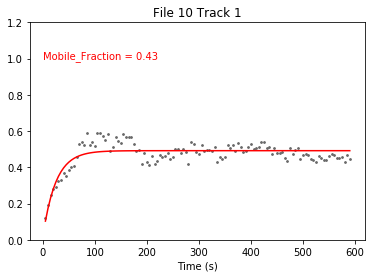

v =  0.8000899314718989
F0 =  0.021032855241496784


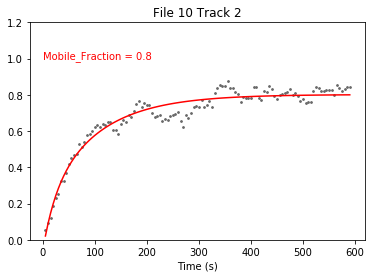

v =  0.7097171885725956
F0 =  0.09107315559639839


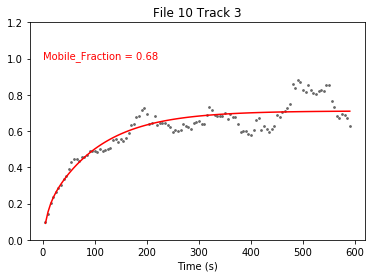

In [67]:
M_list = list()
column = 0

#Use zip to iterate through the traces we want.
for file_number, track_number in zip(clean_summary_df.File, clean_summary_df.Track):
    
    idx = np.where((main_df.File.eq(file_number)) & (main_df.Track.eq(track_number)))

    track_data = main_df.loc[idx]
    
    ## Calculate and Plot FRAP for these traces
    df = track_data.loc[:,["Frame", "focus_intensities", "spot_intensities", "Mean(Bgd)"]]

    sub = subtract_background(df)
    norm = normalise(sub)
    
    ## Get filename 'key'
    filename = track_data.Filename_y.unique()[0]
    
    ## Look up t0
    t0 = t0_dict[filename]
    
    ## Look up fps
    fps = fps_dict[filename]
    
    ## Set Time
    set_time(norm, t0, fps)
    
    FRAP = get_FRAP(norm, t0)

    column_name = FRAP.columns[column]

    x = FRAP['Time']
    y0 = FRAP.iloc[:,column]

    #Plot raw values
    plt.scatter(x, y0, s=3, c='dimgrey');
    
    p0 = [A, B, c, d, h]
    bounds = (0.1, 0.01, 0, 0, 0.01), (1, 1, 100, 100, 1)
    
    y2, p, e = fit_bi_exp(x, y0, p0, bounds)
    
    #Plot fit values
    plt.plot(x, y2, c='r');
    
    #Get Mobile Fraction Estimate
    Mobile_Fraction = get_mobile_from_fit(y2)
    
    M_list.append(Mobile_Fraction)
    
    plt.text(0, 1, s='Mobile_Fraction = '+str(round(Mobile_Fraction, 2)), c='r');
    
    plt.title("File "+ str(file_number) + " Track "+ str(track_number))
    plt.ylim(0,1.2);
    plt.xlabel('Time (s)');
    plt.show()

## Get the Mobile Fraction

In [68]:
clean_summary_df["Mobile Fraction"] = M_list

In [69]:
#If you have seaborn
import seaborn as sns

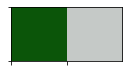

In [70]:
colors = ["forest", "silver"]
sns.palplot(sns.xkcd_palette(colors))

In [71]:
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

In [72]:
colors = ["forestgreen", "dimgrey"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

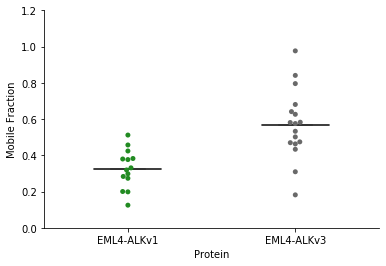

In [82]:
sns.boxplot('ALKv3', 'Mobile Fraction', data=clean_summary_df.groupby(by='ALKv3').mean().reset_index(), width=0.4)
sns.swarmplot('ALKv3', 'Mobile Fraction', data=clean_summary_df)
sns.despine()
plt.ylim(0,1.2);
plt.ylabel('Mobile Fraction');
plt.xlabel('Protein');
plt.xticks([0,1], ["EML4-ALKv1", "EML4-ALKv3"]);
plt.savefig('Figures/Mobile_Fractions_By_Protein.pdf', format='pdf');

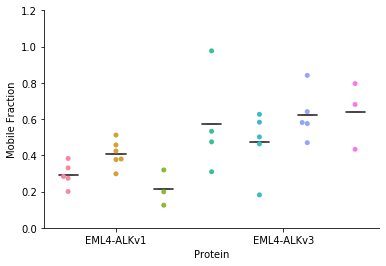

In [81]:
#Can we mark swarmplot by file?
sns.boxplot('File', 'Mobile Fraction', data=clean_summary_df.groupby(by='File').mean().reset_index(), width=0.4)
sns.swarmplot('File', 'Mobile Fraction', data=clean_summary_df)
sns.despine()
plt.ylim(0,1.2);
plt.ylabel('Mobile Fraction');
plt.xlabel('Protein');
plt.xticks([1,4.5], ["EML4-ALKv1", "EML4-ALKv3"]);
plt.savefig('Figures/Mobile_Fractions_By_Experiment.pdf', format='pdf');

In [75]:
## Check File 7 Track 1, 100% recovery

In [76]:
## Fit the Means and Calculate t1/2

In [77]:
np.array(ALKv1_time)

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
       115., 120., 125., 130., 135., 140., 145., 150., 155., 160., 165.,
       170., 175., 180., 185., 190., 195., 200., 205., 210., 215., 220.,
       225., 230., 235., 240., 245., 250., 255., 260., 265., 270., 275.,
       280., 285., 290., 295., 300., 305., 310., 315., 320., 325., 330.,
       335., 340., 345., 350., 355., 360., 365., 370., 375., 380., 385.,
       390., 395., 400., 405., 410., 415., 420., 425., 430., 435., 440.,
       445., 450., 455., 460., 465., 470., 475., 480., 485., 490., 495.,
       500., 505., 510., 515., 520., 525., 530., 535., 540., 545., 550.,
       555., 560., 565., 570., 575., 580., 585., 590.])

In [78]:
ALKv1_mean

0      0.094483
1      0.117463
2      0.175837
3      0.199087
4      0.206906
         ...   
113    0.394742
114    0.387467
115    0.393954
116    0.400645
117    0.394584
Length: 118, dtype: float64

v =  0.3875932959669459
F0 =  0.08624522368559495


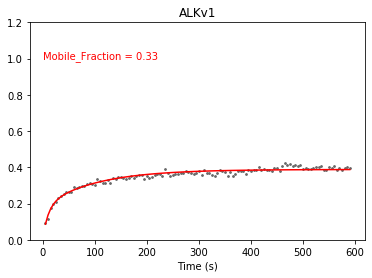

In [79]:
x=np.array(ALKv1_time)
y0=np.array(ALKv1_mean)

#Plot raw values
plt.scatter(x, y0, s=3, c='dimgrey');

p0 = [A, B, c, d, h]
bounds = (0.1, 0.01, 0, 0, 0.01), (1, 1, 100, 100, 1)

y2, p, e = fit_bi_exp(x, y0, p0, bounds)

#Plot fit values
plt.plot(x, y2, c='r');

#Get Mobile Fraction Estimate
Mobile_Fraction = get_mobile_from_fit(y2)

plt.text(0, 1, s='Mobile_Fraction = '+str(round(Mobile_Fraction, 2)), c='r');

plt.title("ALKv1")
plt.ylim(0,1.2);
plt.xlabel('Time (s)');
plt.show()

v =  0.5965763309914298
F0 =  0.10511516401049509


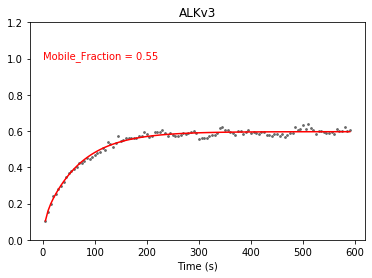

In [80]:
x=np.array(ALKv1_time)
y0=np.array(ALKv3_mean)

#Plot raw values
plt.scatter(x, y0, s=3, c='dimgrey');

p0 = [A, B, c, d, h]
bounds = (0.1, 0.01, 0, 0, 0.01), (1, 1, 100, 100, 1)

y2, p, e = fit_bi_exp(x, y0, p0, bounds)

#Plot fit values
plt.plot(x, y2, c='r');

#Get Mobile Fraction Estimate
Mobile_Fraction = get_mobile_from_fit(y2)

plt.text(0, 1, s='Mobile_Fraction = '+str(round(Mobile_Fraction, 2)), c='r');

plt.title("ALKv3")
plt.ylim(0,1.2);
plt.xlabel('Time (s)');
plt.show()